# Übung 1: Backpropagation für Mehrschichtperzeptronen

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Spielzeugdatensatz
Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungsseite auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den Spielzeugdaten aus der Vorlesung trainieren.

### 1.1 
Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichverteilung über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [2]:
train_data = np.random.uniform(low=-6, high=6, size=(200, 2))

### 1.2
Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array

In [3]:
train_labels = np.where((train_data[:, 0] >= 0) & (train_data[:, 1] >= 0) | (train_data[:, 0] <= 0) & (train_data[:, 1] <= 0), 1, 0)

### 1.3
Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. 

In [4]:
# test data and test labels
test_data = np.random.uniform(low=-6, high=6, size=(200, 2))
test_labels = np.where((test_data[:, 0] >= 0) & (test_data[:, 1] >= 0) | (test_data[:, 0] <= 0) & (test_data[:, 1] <= 0), 1, 0)

Stellen Sie beide Datensätze zur Überprüfung als Scatterplot dar.

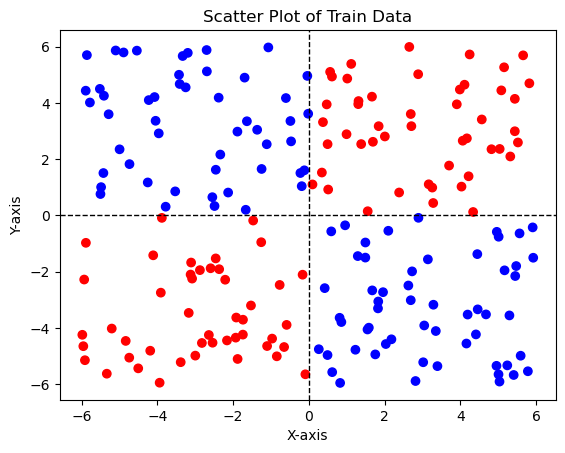

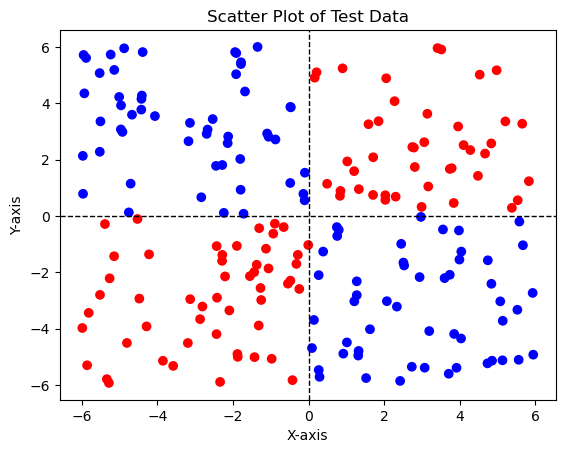

In [5]:
def plot_uniform(data, labels, title):
    colors = ['b' if y==0 else 'r' for y in labels]
    plt.scatter(data[:, 0], data[:, 1], c=colors, marker='o', label='Data Points')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.show()
    

plot_uniform(train_data, train_labels, 'Scatter Plot of Train Data')
plot_uniform(test_data, test_labels, 'Scatter Plot of Test Data')

### 1.4
Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten, sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige Neuron aussehen?

Gewichtsvektoren müssen so aussehen:
w1 = [1  0]
w2 = [0  1]

In [6]:
# Gewichtsvektoren für die beiden Neuronen

w1 = np.array([0.0, 1.0])   # teilt entlang der y - Achse
w2 = np.array([1.0, 0.0])   # teilt entlang der x - Achse
w_fixed = np.array([w1, w2])
w_fixed.shape

(2, 2)

### 1.5
Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

In [7]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


# Erzeugen eines 100x100-Gitters im Bereich [-6, 6] x [-6, 6]
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Berechnen der Entscheidungsfunktionen für beide Neuronen mit Sigmoid-Aktivierungsfunktion
func_neuron_1 = sigmoid(x_grid)
func_neuron_2 = sigmoid(y_grid)

func_neuron_1_reshaped = func_neuron_1.reshape((100, 100))
func_neuron_2_reshaped = func_neuron_2.reshape((100, 100))

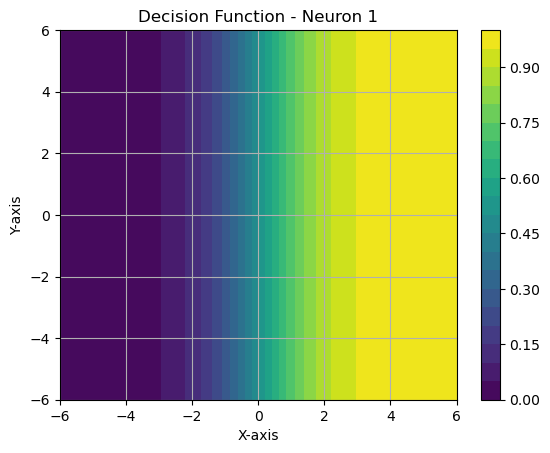

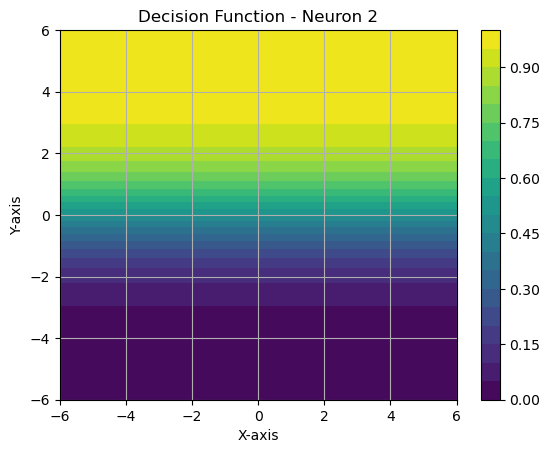

In [8]:
def plot_decision_function(x_vals, y_vals, func, title):
    plt.contourf(x_vals, y_vals, func, levels=20 ,cmap='viridis')
    plt.grid()
    plt.title('Decision Function - ' + title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar()
    plt.show()

plot_decision_function(x_vals, y_vals, func_neuron_1_reshaped, "Neuron 1")
plot_decision_function(x_vals, y_vals, func_neuron_2_reshaped, "Neuron 2")

### 1.6
Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings- und Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entsprechende Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [9]:
# Ausgaben der Neuronen für Trainingsdaten berechnen
train_output_w1 = sigmoid(np.dot(train_data, w1))
train_output_w2 = sigmoid(np.dot(train_data, w2))
train_design = np.column_stack((train_output_w1, train_output_w2 ))

# Ausgaben der Neuronen für Testdaten berechnen
test_output_w1 = sigmoid(np.dot(test_data, w1))
test_output_w2 = sigmoid(np.dot(test_data, w2))
test_design = np.column_stack((test_output_w1, test_output_w2))

# Designmatrix für das 100x100-Gitter erstellen
grid_data_flat = np.column_stack((x_grid.flatten(), y_grid.flatten()))
X1 = np.dot(grid_data_flat, w1)
X2 = np.dot(grid_data_flat, w2)
X1_sig = sigmoid(X1)
X2_sig = sigmoid(X2)
grid_design = np.column_stack((X1_sig, X2_sig))
# grid_design = np.zeros((100*100,2))

# Überprüfen der Form der neuen Designmatrizen
print("Form der neuen Designmatrizen:")
print("Trainingsoutput:", train_design.shape)
print("Testoutput:", test_design.shape)
print("Gridoutput:", grid_design.shape)

Form der neuen Designmatrizen:
Trainingsoutput: (200, 2)
Testoutput: (200, 2)
Gridoutput: (10000, 2)


## 2. Training eines MLPs auf den Spielzeugdaten
Der Code aus dem Beispielnotebook muss zunächst an das Szenario aus der Vorlesung angepasst werden: ein deutlich kleineres Netzwerk mit eindimensionalem statt zehndimensionalem Output.

### 2.1
Setzen Sie im Code die Größe der Minibatches auf 10, die Anzahl der Epochen
auf 150 und die Lernrate auf 0.03. Ändern Sie die Netzarchitektur so ab, dass sie 2 Eingangsneuronen, 2 verdeckte Schichten mit jeweils 2 Neuronen und 1 Ausgangsneuron haben. Überprüfen Sie die Größen der sich daraus ergebenden Gewichtsmatritzen auf Korrektheit.


In [10]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                    # Lernrate
no_hidden = 2                # Anzahl versteckter Neuronen
epochs = 1500                 # Anzahl Epochen
sizes = [2, no_hidden, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(2, 2)
(2, 2)
(1, 2)


### 2.2
Der Beispielcode verwendet One-Hot-Coding für die Labels, in unserem Beispiel sind
die Klassenzugehörigkeiten aber durch die Klassenindizes 0 und 1 codiert. Wir müssen daher die Funktion evaluate() im Code so abändern, dass ein Beispiel als korrekt klassifiziert gilt, wenn bei Klasse 0 der MLP-Output kleiner als 0.5 ist und bei Klasse 1 größer als 0.5. Berechnen Sie zusätzlich den MSE in dieser Funktion bei jedem Aufruf uns speichern Sie diesen in einem zusätzlichen Array ab.

In [11]:
# Einige Hilfsfunktionen:

# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

# Vorwärtslauf durch das Netzwerk für Testläufe (Prädiktion):
def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

# Backpropagation-Algorithmus für ein Paar aus Input x und Label y:
def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    
    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = sigmoid_prime(z) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

# Gemitteltes Update über einen Minibatch:
def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        
        # Addiere einzelne Updates auf
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw
                    for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb
                   for b, nb in zip(biases, nabla_b)]
    
    return (weights, biases)

Hilfsfunktion zur Evaluation des Netzwerkes auf den Testdaten:

In [12]:
from sklearn.metrics import mean_squared_error


def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    y_arr = []
    ypred_arr = []
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        
        # print(ypred, y) # check shape for debugging
        ypred_arr.append(ypred[0][0])
        y_arr.append(y)
        
        if y <= 0.5:
            c = 0
        else:
            c = 1
        
        if ypred <= 0.5:
            cpred = 0
        else:
            cpred = 1
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        if c == cpred:
            correct += 1
            
    mse_lib = mean_squared_error(y_arr, ypred_arr)
    
    return correct, mse_lib

### 2.3
Trainieren Sie Ihr Netz mit den Trainingsdaten als Validierungsdaten und testen Sie es auf Ihren Testdaten. Stellen Sie die Lernkurven für Genauigkeit und MSE als Plots dar. Beachten Sie hierbei, dass unser Lernproblem nicht konvex ist, so dass die Optimierung zuweilen in lokalen Minima hängenbleiben kann. Wiederholen Sie Ihren Versuch daher mehrere Male und vergeleichen Sie die Ergebnisse.

Stochastischer Gradientenabstieg:

In [13]:
def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse = np.zeros(epochs)
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]
        
        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)
        
        # Gib Performance aus
        acc_val[j], mse[j] = evaluate(x2, y2)
        print("\tLoss {0}: {1}".format(j, mse[j]))
        print("Epoch {0}: {1} / {2}".format(j, acc_val[j], n_test))
    
    return acc_val, mse

Training:

In [14]:
acc_val_save, mse_save = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 0.3311181955106507
Epoch 0: 106.0 / 200
	Loss 1: 0.32814170408506727
Epoch 1: 106.0 / 200
	Loss 2: 0.32515850937703583
Epoch 2: 106.0 / 200
	Loss 3: 0.32216644021949975
Epoch 3: 106.0 / 200
	Loss 4: 0.3191798119185195
Epoch 4: 106.0 / 200
	Loss 5: 0.3162050693232781
Epoch 5: 106.0 / 200
	Loss 6: 0.31325178981293716
Epoch 6: 106.0 / 200
	Loss 7: 0.3103237658329939
Epoch 7: 106.0 / 200
	Loss 8: 0.30742862876790333
Epoch 8: 106.0 / 200
	Loss 9: 0.3045784545310144
Epoch 9: 106.0 / 200
	Loss 10: 0.30177428956528657
Epoch 10: 106.0 / 200
	Loss 11: 0.2990197285129152
Epoch 11: 106.0 / 200
	Loss 12: 0.29633394924967094
Epoch 12: 106.0 / 200
	Loss 13: 0.2937180404098616
Epoch 13: 106.0 / 200
	Loss 14: 0.29117778796493893
Epoch 14: 106.0 / 200
	Loss 15: 0.2887116759888625
Epoch 15: 106.0 / 200
	Loss 16: 0.28633396045768
Epoch 16: 106.0 / 200
	Loss 17: 0.2840397123104422
Epoch 17: 106.0 / 200
	Loss 18: 0.28183105614617565
Epoch 18: 106.0 / 200
	Loss 19: 0.2797137235969499
Epoch 19: 106.0

	Loss 175: 0.2490861827018317
Epoch 175: 106.0 / 200
	Loss 176: 0.2490861772290475
Epoch 176: 106.0 / 200
	Loss 177: 0.2490861727019087
Epoch 177: 106.0 / 200
	Loss 178: 0.24908617057207852
Epoch 178: 106.0 / 200
	Loss 179: 0.24908616882548418
Epoch 179: 106.0 / 200
	Loss 180: 0.24908617287754076
Epoch 180: 106.0 / 200
	Loss 181: 0.24908616908398287
Epoch 181: 106.0 / 200
	Loss 182: 0.24908616361199573
Epoch 182: 106.0 / 200
	Loss 183: 0.24908616781481396
Epoch 183: 106.0 / 200
	Loss 184: 0.24908617184673618
Epoch 184: 106.0 / 200
	Loss 185: 0.24908616442530726
Epoch 185: 106.0 / 200
	Loss 186: 0.24908616459872768
Epoch 186: 106.0 / 200
	Loss 187: 0.24908616143545362
Epoch 187: 106.0 / 200
	Loss 188: 0.24908616820182775
Epoch 188: 106.0 / 200
	Loss 189: 0.24908616125564703
Epoch 189: 106.0 / 200
	Loss 190: 0.24908614602808535
Epoch 190: 106.0 / 200
	Loss 191: 0.24908613210561117
Epoch 191: 106.0 / 200
	Loss 192: 0.24908613376889854
Epoch 192: 106.0 / 200
	Loss 193: 0.2490861376816318
E

	Loss 330: 0.24908563450730667
Epoch 330: 106.0 / 200
	Loss 331: 0.24908562883657162
Epoch 331: 106.0 / 200
	Loss 332: 0.2490856243133724
Epoch 332: 106.0 / 200
	Loss 333: 0.24908562062970105
Epoch 333: 106.0 / 200
	Loss 334: 0.2490856167825412
Epoch 334: 106.0 / 200
	Loss 335: 0.24908561573940866
Epoch 335: 106.0 / 200
	Loss 336: 0.24908561189134695
Epoch 336: 106.0 / 200
	Loss 337: 0.24908560588994114
Epoch 337: 106.0 / 200
	Loss 338: 0.24908560268831928
Epoch 338: 106.0 / 200
	Loss 339: 0.24908559954265413
Epoch 339: 106.0 / 200
	Loss 340: 0.24908559576911724
Epoch 340: 106.0 / 200
	Loss 341: 0.24908559187239349
Epoch 341: 106.0 / 200
	Loss 342: 0.2490855883856167
Epoch 342: 106.0 / 200
	Loss 343: 0.24908558474963566
Epoch 343: 106.0 / 200
	Loss 344: 0.24908558124007973
Epoch 344: 106.0 / 200
	Loss 345: 0.2490855775427836
Epoch 345: 106.0 / 200
	Loss 346: 0.24908557399573092
Epoch 346: 106.0 / 200
	Loss 347: 0.24908557238944418
Epoch 347: 106.0 / 200
	Loss 348: 0.24908556896285347
E

	Loss 503: 0.24908501704487127
Epoch 503: 106.0 / 200
	Loss 504: 0.24908501222586096
Epoch 504: 106.0 / 200
	Loss 505: 0.24908501303513902
Epoch 505: 106.0 / 200
	Loss 506: 0.2490850072936815
Epoch 506: 106.0 / 200
	Loss 507: 0.24908500348682291
Epoch 507: 106.0 / 200
	Loss 508: 0.249084996176569
Epoch 508: 106.0 / 200
	Loss 509: 0.24908499362023362
Epoch 509: 106.0 / 200
	Loss 510: 0.2490849878121084
Epoch 510: 106.0 / 200
	Loss 511: 0.24908498426078216
Epoch 511: 106.0 / 200
	Loss 512: 0.24908498061133685
Epoch 512: 106.0 / 200
	Loss 513: 0.24908497854760078
Epoch 513: 106.0 / 200
	Loss 514: 0.24908497607205293
Epoch 514: 106.0 / 200
	Loss 515: 0.24908497300956817
Epoch 515: 106.0 / 200
	Loss 516: 0.2490849690823686
Epoch 516: 106.0 / 200
	Loss 517: 0.24908496342964256
Epoch 517: 106.0 / 200
	Loss 518: 0.24908495920849616
Epoch 518: 106.0 / 200
	Loss 519: 0.24908495770138486
Epoch 519: 106.0 / 200
	Loss 520: 0.24908495420046164
Epoch 520: 106.0 / 200
	Loss 521: 0.2490849526176693
Epo

	Loss 657: 0.24908445389754658
Epoch 657: 106.0 / 200
	Loss 658: 0.24908444969708118
Epoch 658: 106.0 / 200
	Loss 659: 0.24908444597387525
Epoch 659: 106.0 / 200
	Loss 660: 0.24908444207016686
Epoch 660: 106.0 / 200
	Loss 661: 0.24908443863887889
Epoch 661: 106.0 / 200
	Loss 662: 0.24908443470379546
Epoch 662: 106.0 / 200
	Loss 663: 0.24908443138967454
Epoch 663: 106.0 / 200
	Loss 664: 0.24908442745321363
Epoch 664: 106.0 / 200
	Loss 665: 0.24908442368974465
Epoch 665: 106.0 / 200
	Loss 666: 0.24908442016873628
Epoch 666: 106.0 / 200
	Loss 667: 0.2490844163374156
Epoch 667: 106.0 / 200
	Loss 668: 0.24908441264273898
Epoch 668: 106.0 / 200
	Loss 669: 0.24908440956408776
Epoch 669: 106.0 / 200
	Loss 670: 0.24908440586973632
Epoch 670: 106.0 / 200
	Loss 671: 0.24908440228716294
Epoch 671: 106.0 / 200
	Loss 672: 0.24908440035078094
Epoch 672: 106.0 / 200
	Loss 673: 0.24908439510486752
Epoch 673: 106.0 / 200
	Loss 674: 0.24908439525377898
Epoch 674: 106.0 / 200
	Loss 675: 0.2490843872248111

	Loss 810: 0.24908389610901083
Epoch 810: 106.0 / 200
	Loss 811: 0.24908389328261407
Epoch 811: 106.0 / 200
	Loss 812: 0.2490838863725392
Epoch 812: 106.0 / 200
	Loss 813: 0.24908388083122568
Epoch 813: 106.0 / 200
	Loss 814: 0.24908387689060732
Epoch 814: 106.0 / 200
	Loss 815: 0.2490838697984227
Epoch 815: 106.0 / 200
	Loss 816: 0.24908386691740136
Epoch 816: 106.0 / 200
	Loss 817: 0.24908386406346097
Epoch 817: 106.0 / 200
	Loss 818: 0.24908386114877615
Epoch 818: 106.0 / 200
	Loss 819: 0.24908385618319762
Epoch 819: 106.0 / 200
	Loss 820: 0.24908385115113701
Epoch 820: 106.0 / 200
	Loss 821: 0.24908385017173804
Epoch 821: 106.0 / 200
	Loss 822: 0.249083846527287
Epoch 822: 106.0 / 200
	Loss 823: 0.24908384414613188
Epoch 823: 106.0 / 200
	Loss 824: 0.24908384243295742
Epoch 824: 106.0 / 200
	Loss 825: 0.2490838331292198
Epoch 825: 106.0 / 200
	Loss 826: 0.24908383159366665
Epoch 826: 106.0 / 200
	Loss 827: 0.24908382777459157
Epoch 827: 106.0 / 200
	Loss 828: 0.2490838225338932
Epo

	Loss 981: 0.24908324348970587
Epoch 981: 106.0 / 200
	Loss 982: 0.2490832399168545
Epoch 982: 106.0 / 200
	Loss 983: 0.2490832372080115
Epoch 983: 106.0 / 200
	Loss 984: 0.24908323582972258
Epoch 984: 106.0 / 200
	Loss 985: 0.2490832319078136
Epoch 985: 106.0 / 200
	Loss 986: 0.24908322492324428
Epoch 986: 106.0 / 200
	Loss 987: 0.24908322082290316
Epoch 987: 106.0 / 200
	Loss 988: 0.24908321685136162
Epoch 988: 106.0 / 200
	Loss 989: 0.24908321330816643
Epoch 989: 106.0 / 200
	Loss 990: 0.249083209249231
Epoch 990: 106.0 / 200
	Loss 991: 0.24908320645900425
Epoch 991: 106.0 / 200
	Loss 992: 0.24908320212894539
Epoch 992: 106.0 / 200
	Loss 993: 0.2490831982815222
Epoch 993: 106.0 / 200
	Loss 994: 0.24908319839352486
Epoch 994: 106.0 / 200
	Loss 995: 0.249083194136439
Epoch 995: 106.0 / 200
	Loss 996: 0.24908318905781407
Epoch 996: 106.0 / 200
	Loss 997: 0.24908319144677865
Epoch 997: 106.0 / 200
	Loss 998: 0.24908318367703827
Epoch 998: 106.0 / 200
	Loss 999: 0.24908317513389208
Epoch

	Loss 1136: 0.24908267246515345
Epoch 1136: 106.0 / 200
	Loss 1137: 0.24908266700252202
Epoch 1137: 106.0 / 200
	Loss 1138: 0.2490826568409769
Epoch 1138: 106.0 / 200
	Loss 1139: 0.24908265065240656
Epoch 1139: 106.0 / 200
	Loss 1140: 0.2490826525073432
Epoch 1140: 106.0 / 200
	Loss 1141: 0.24908264367674982
Epoch 1141: 106.0 / 200
	Loss 1142: 0.24908263106069953
Epoch 1142: 106.0 / 200
	Loss 1143: 0.2490826250968622
Epoch 1143: 106.0 / 200
	Loss 1144: 0.2490826224962342
Epoch 1144: 106.0 / 200
	Loss 1145: 0.24908262278183024
Epoch 1145: 106.0 / 200
	Loss 1146: 0.24908261437543175
Epoch 1146: 106.0 / 200
	Loss 1147: 0.2490826158406498
Epoch 1147: 106.0 / 200
	Loss 1148: 0.24908260808835106
Epoch 1148: 106.0 / 200
	Loss 1149: 0.24908260479479394
Epoch 1149: 106.0 / 200
	Loss 1150: 0.2490825982076733
Epoch 1150: 106.0 / 200
	Loss 1151: 0.24908259545224254
Epoch 1151: 106.0 / 200
	Loss 1152: 0.24908259291989496
Epoch 1152: 106.0 / 200
	Loss 1153: 0.24908258629750685
Epoch 1153: 106.0 / 20

	Loss 1294: 0.2490820368358445
Epoch 1294: 106.0 / 200
	Loss 1295: 0.24908203107588464
Epoch 1295: 106.0 / 200
	Loss 1296: 0.24908202714112307
Epoch 1296: 106.0 / 200
	Loss 1297: 0.24908202195277368
Epoch 1297: 106.0 / 200
	Loss 1298: 0.2490820160018483
Epoch 1298: 106.0 / 200
	Loss 1299: 0.24908201184879025
Epoch 1299: 106.0 / 200
	Loss 1300: 0.24908200675573547
Epoch 1300: 106.0 / 200
	Loss 1301: 0.24908200331358216
Epoch 1301: 106.0 / 200
	Loss 1302: 0.24908200142577194
Epoch 1302: 106.0 / 200
	Loss 1303: 0.24908199925899516
Epoch 1303: 106.0 / 200
	Loss 1304: 0.24908199222104468
Epoch 1304: 106.0 / 200
	Loss 1305: 0.24908198728991826
Epoch 1305: 106.0 / 200
	Loss 1306: 0.24908198576178947
Epoch 1306: 106.0 / 200
	Loss 1307: 0.24908198225225825
Epoch 1307: 106.0 / 200
	Loss 1308: 0.24908198182018249
Epoch 1308: 106.0 / 200
	Loss 1309: 0.24908197638089305
Epoch 1309: 106.0 / 200
	Loss 1310: 0.24908197609655092
Epoch 1310: 106.0 / 200
	Loss 1311: 0.24908196903052363
Epoch 1311: 106.0 

	Loss 1450: 0.24908141130221775
Epoch 1450: 106.0 / 200
	Loss 1451: 0.24908140596154382
Epoch 1451: 106.0 / 200
	Loss 1452: 0.24908140140602203
Epoch 1452: 106.0 / 200
	Loss 1453: 0.24908139759946965
Epoch 1453: 106.0 / 200
	Loss 1454: 0.24908139276196187
Epoch 1454: 106.0 / 200
	Loss 1455: 0.2490813889554745
Epoch 1455: 106.0 / 200
	Loss 1456: 0.2490813846243104
Epoch 1456: 106.0 / 200
	Loss 1457: 0.24908138057597945
Epoch 1457: 106.0 / 200
	Loss 1458: 0.24908137729185093
Epoch 1458: 106.0 / 200
	Loss 1459: 0.24908137284750909
Epoch 1459: 106.0 / 200
	Loss 1460: 0.2490813697804347
Epoch 1460: 106.0 / 200
	Loss 1461: 0.24908136461710767
Epoch 1461: 106.0 / 200
	Loss 1462: 0.2490813604328708
Epoch 1462: 106.0 / 200
	Loss 1463: 0.24908135639360748
Epoch 1463: 106.0 / 200
	Loss 1464: 0.24908135246838295
Epoch 1464: 106.0 / 200
	Loss 1465: 0.2490813503860779
Epoch 1465: 106.0 / 200
	Loss 1466: 0.24908134707830043
Epoch 1466: 106.0 / 200
	Loss 1467: 0.24908134214937966
Epoch 1467: 106.0 / 2

Evaluation auf den unabhängigen Testdaten:

In [15]:
acc_val_test_save, loss_test_save = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test_save, test_design.shape[0]))
print("Test loss: {0}".format(loss_test_save))

Test accuracy: 105 / 200
Test loss: 0.24944438105344097


Lernkurve (Genauigkeit auf Validierungsdatensatz):

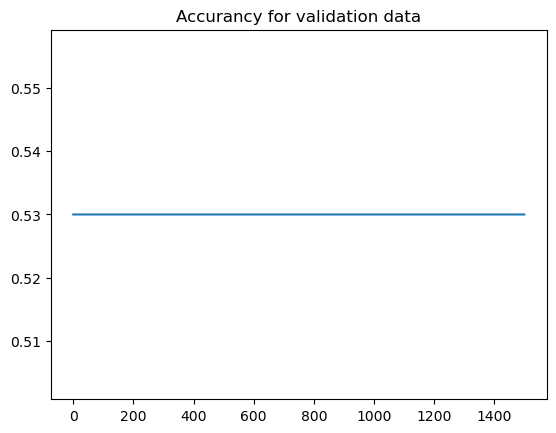

In [16]:
plt.plot(acc_val_save/train_design.shape[0])
plt.title("Accurancy for validation data");

Lernkurve für MSE auf Validierungsdatensatz

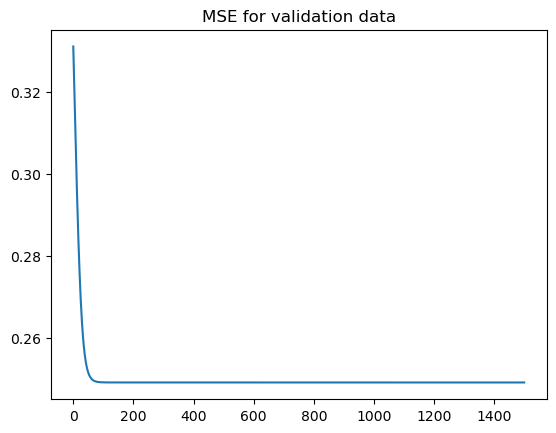

In [17]:
plt.plot(mse_save)
plt.title("MSE for validation data");

### 2.4
Berechnen Sie die Entscheidungsfunktion Ihres MLPs für Ihr 100 × 100-Gitter und
stellen Sie diese gemeinsam mit dem Scatterplot Ihrer Trainingsdaten dar.

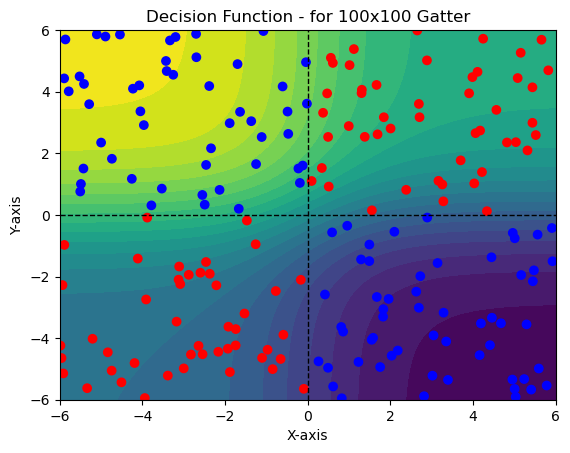

In [18]:
# Entscheidungsfunktion für das 100x100-Gitter berechnen
# X1X2_sig = sigmoid(np.multiply(X1, X2)).reshape((100,100))
output = feedforward(grid_design.T).reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=20, cmap='viridis')
plot_uniform(train_data, train_labels,'Decision Function - for 100x100 Gatter')

## 3. Nachvollziehen der Beispiele aus der Vorlesung
Das Netz aus der Vorlesung verwendet als Aktivierungsfunktion den Tangens hyperbolicus (np.tanh()). Passen Sie die Funktionen sigmoid() und sigmoid_prime() entsprechend an. Achtung: kommentieren Sie den bisherigen Code für die Sigmoidfunktion nur aus, wir werden ihn in der nächsten Aufgabe nochmals benötigen. Da die Ausgangswerte von tanh im Intervall [−1, 1] statt [0, 1] liegen, müssen wir hierfür nochmals die Funktion evaluate() entsprechend anpassen. Vollziehen Sie die 3 Beispiele aus der Vorlesung nach.

In [19]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    #return 1.0/(1.0+np.exp(-z))
    return np.tanh(z)

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return 1 - (np.tanh(z)**2) # oder 1/(np.cosh(z)**2)

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    y_arr = []
    ypred_arr = []
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        ypred_arr.append(ypred[0][0])
        y_arr.append(y)
        
        if y <= 0.0:
            c = 0
        else:
            c = 1
        
        if ypred <= 0.0:
            cpred = 0
        else:
            cpred = 1
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        if c == cpred:
            correct += 1
    
    mse_lib = mean_squared_error(y_arr, ypred_arr)
    
    return correct, mse_lib

Experiment 1: eine versteckte Schicht mit 2 Neuronen

In [20]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                   # Lernrate
no_hidden = 2                # Anzahl versteckter Neuronen
epochs = 1500                 # Anzahl Epochen
sizes = [2, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(2, 2)
(1, 2)


In [21]:
acc_val, mse = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 0.2824824453938392
Epoch 0: 99.0 / 200
	Loss 1: 0.27035957624897533
Epoch 1: 94.0 / 200
	Loss 2: 0.26795990896114863
Epoch 2: 94.0 / 200
	Loss 3: 0.26691658593403367
Epoch 3: 94.0 / 200
	Loss 4: 0.26593229565962057
Epoch 4: 94.0 / 200
	Loss 5: 0.26504974422104843
Epoch 5: 94.0 / 200
	Loss 6: 0.26412204645526005
Epoch 6: 94.0 / 200
	Loss 7: 0.2632651584006493
Epoch 7: 94.0 / 200
	Loss 8: 0.26240660957851075
Epoch 8: 94.0 / 200
	Loss 9: 0.26157072688848015
Epoch 9: 94.0 / 200
	Loss 10: 0.2607647621728051
Epoch 10: 94.0 / 200
	Loss 11: 0.25997964542294505
Epoch 11: 94.0 / 200
	Loss 12: 0.25921010139160905
Epoch 12: 94.0 / 200
	Loss 13: 0.2584628271261551
Epoch 13: 94.0 / 200
	Loss 14: 0.2577393603595548
Epoch 14: 94.0 / 200
	Loss 15: 0.25703933316225064
Epoch 15: 94.0 / 200
	Loss 16: 0.2563763016053743
Epoch 16: 94.0 / 200
	Loss 17: 0.25574420652382174
Epoch 17: 94.0 / 200
	Loss 18: 0.25515722022031184
Epoch 18: 94.0 / 200
	Loss 19: 0.2545156550099519
Epoch 19: 94.0 / 200
	Loss 2

	Loss 179: 0.22301418270387827
Epoch 179: 94.0 / 200
	Loss 180: 0.2227861158634744
Epoch 180: 94.0 / 200
	Loss 181: 0.22258132732272692
Epoch 181: 94.0 / 200
	Loss 182: 0.22234594924690515
Epoch 182: 94.0 / 200
	Loss 183: 0.22213234832217815
Epoch 183: 94.0 / 200
	Loss 184: 0.22194728697437782
Epoch 184: 94.0 / 200
	Loss 185: 0.22171728081297176
Epoch 185: 94.0 / 200
	Loss 186: 0.22148386579766996
Epoch 186: 94.0 / 200
	Loss 187: 0.22121576393127906
Epoch 187: 94.0 / 200
	Loss 188: 0.22098854127578277
Epoch 188: 94.0 / 200
	Loss 189: 0.2207756979011408
Epoch 189: 94.0 / 200
	Loss 190: 0.2206954221921292
Epoch 190: 94.0 / 200
	Loss 191: 0.22030769839011186
Epoch 191: 94.0 / 200
	Loss 192: 0.2200965372531419
Epoch 192: 94.0 / 200
	Loss 193: 0.21987879456341142
Epoch 193: 94.0 / 200
	Loss 194: 0.21964119763924914
Epoch 194: 94.0 / 200
	Loss 195: 0.21938078994613594
Epoch 195: 94.0 / 200
	Loss 196: 0.21914613733894212
Epoch 196: 94.0 / 200
	Loss 197: 0.2189634564593252
Epoch 197: 94.0 / 20

	Loss 360: 0.18572927392438815
Epoch 360: 94.0 / 200
	Loss 361: 0.18563103478289542
Epoch 361: 94.0 / 200
	Loss 362: 0.18545986691269978
Epoch 362: 94.0 / 200
	Loss 363: 0.18532795088602538
Epoch 363: 94.0 / 200
	Loss 364: 0.18521300088486725
Epoch 364: 94.0 / 200
	Loss 365: 0.18509366198486518
Epoch 365: 94.0 / 200
	Loss 366: 0.18496016733628703
Epoch 366: 94.0 / 200
	Loss 367: 0.18480991078322317
Epoch 367: 98.0 / 200
	Loss 368: 0.18468262665143684
Epoch 368: 101.0 / 200
	Loss 369: 0.18456805925254005
Epoch 369: 95.0 / 200
	Loss 370: 0.18448777168018546
Epoch 370: 104.0 / 200
	Loss 371: 0.18430626977296605
Epoch 371: 98.0 / 200
	Loss 372: 0.18417907648020063
Epoch 372: 101.0 / 200
	Loss 373: 0.18405573310403853
Epoch 373: 102.0 / 200
	Loss 374: 0.18398200827944153
Epoch 374: 95.0 / 200
	Loss 375: 0.18387511638471785
Epoch 375: 94.0 / 200
	Loss 376: 0.18371912081893796
Epoch 376: 97.0 / 200
	Loss 377: 0.18357547305470867
Epoch 377: 103.0 / 200
	Loss 378: 0.18346295943254687
Epoch 378:

	Loss 542: 0.1711947659952267
Epoch 542: 113.0 / 200
	Loss 543: 0.17114545879413037
Epoch 543: 113.0 / 200
	Loss 544: 0.17112569948172407
Epoch 544: 113.0 / 200
	Loss 545: 0.17107233954092244
Epoch 545: 115.0 / 200
	Loss 546: 0.17104105509668563
Epoch 546: 113.0 / 200
	Loss 547: 0.17096874112069999
Epoch 547: 113.0 / 200
	Loss 548: 0.1709198060921339
Epoch 548: 115.0 / 200
	Loss 549: 0.1708773057636136
Epoch 549: 113.0 / 200
	Loss 550: 0.17085110956190003
Epoch 550: 115.0 / 200
	Loss 551: 0.17081358068500185
Epoch 551: 116.0 / 200
	Loss 552: 0.17079242890763113
Epoch 552: 116.0 / 200
	Loss 553: 0.17071118455452564
Epoch 553: 115.0 / 200
	Loss 554: 0.17069787908022266
Epoch 554: 116.0 / 200
	Loss 555: 0.1706099450895448
Epoch 555: 114.0 / 200
	Loss 556: 0.17056945674682797
Epoch 556: 113.0 / 200
	Loss 557: 0.1705683102982693
Epoch 557: 113.0 / 200
	Loss 558: 0.17052610638190174
Epoch 558: 113.0 / 200
	Loss 559: 0.17044475973895679
Epoch 559: 115.0 / 200
	Loss 560: 0.1704565795959298
Epo

	Loss 726: 0.1653478808526673
Epoch 726: 116.0 / 200
	Loss 727: 0.16534858403787467
Epoch 727: 116.0 / 200
	Loss 728: 0.1653015643493146
Epoch 728: 116.0 / 200
	Loss 729: 0.16529220820939614
Epoch 729: 116.0 / 200
	Loss 730: 0.1652940241229141
Epoch 730: 116.0 / 200
	Loss 731: 0.1652333304804863
Epoch 731: 116.0 / 200
	Loss 732: 0.165213132780612
Epoch 732: 116.0 / 200
	Loss 733: 0.1651923373876629
Epoch 733: 116.0 / 200
	Loss 734: 0.16527772641774022
Epoch 734: 114.0 / 200
	Loss 735: 0.16514710014645068
Epoch 735: 116.0 / 200
	Loss 736: 0.16513048085542678
Epoch 736: 116.0 / 200
	Loss 737: 0.1651025729867529
Epoch 737: 116.0 / 200
	Loss 738: 0.16508428087777033
Epoch 738: 116.0 / 200
	Loss 739: 0.16506197557708085
Epoch 739: 116.0 / 200
	Loss 740: 0.16511585597087408
Epoch 740: 116.0 / 200
	Loss 741: 0.16501555929634676
Epoch 741: 116.0 / 200
	Loss 742: 0.16499343615797232
Epoch 742: 116.0 / 200
	Loss 743: 0.16502433331874553
Epoch 743: 116.0 / 200
	Loss 744: 0.1649823635392108
Epoch 

	Loss 906: 0.1621512657997237
Epoch 906: 116.0 / 200
	Loss 907: 0.1621591834112857
Epoch 907: 116.0 / 200
	Loss 908: 0.16212328804132906
Epoch 908: 117.0 / 200
	Loss 909: 0.16210241518395982
Epoch 909: 117.0 / 200
	Loss 910: 0.16211405239083185
Epoch 910: 116.0 / 200
	Loss 911: 0.1621020691300391
Epoch 911: 116.0 / 200
	Loss 912: 0.16206072612554423
Epoch 912: 117.0 / 200
	Loss 913: 0.16204646557601068
Epoch 913: 117.0 / 200
	Loss 914: 0.16202911365173137
Epoch 914: 117.0 / 200
	Loss 915: 0.1620661088617009
Epoch 915: 117.0 / 200
	Loss 916: 0.16216986018557492
Epoch 916: 118.0 / 200
	Loss 917: 0.16206429612035367
Epoch 917: 117.0 / 200
	Loss 918: 0.16197346724545866
Epoch 918: 117.0 / 200
	Loss 919: 0.161979489396194
Epoch 919: 116.0 / 200
	Loss 920: 0.16194823750766646
Epoch 920: 117.0 / 200
	Loss 921: 0.1619328302491609
Epoch 921: 117.0 / 200
	Loss 922: 0.1619479290701379
Epoch 922: 116.0 / 200
	Loss 923: 0.1619156066134642
Epoch 923: 117.0 / 200
	Loss 924: 0.16189778080642533
Epoch 

	Loss 1079: 0.16008801734230846
Epoch 1079: 117.0 / 200
	Loss 1080: 0.16007130596419167
Epoch 1080: 117.0 / 200
	Loss 1081: 0.16006513030788042
Epoch 1081: 117.0 / 200
	Loss 1082: 0.16015692780598265
Epoch 1082: 116.0 / 200
	Loss 1083: 0.16003670803812697
Epoch 1083: 117.0 / 200
	Loss 1084: 0.1600567014350224
Epoch 1084: 117.0 / 200
	Loss 1085: 0.16004278300522715
Epoch 1085: 117.0 / 200
	Loss 1086: 0.1600466610731263
Epoch 1086: 117.0 / 200
	Loss 1087: 0.1600100038407361
Epoch 1087: 117.0 / 200
	Loss 1088: 0.16004997169930188
Epoch 1088: 117.0 / 200
	Loss 1089: 0.15999247040988102
Epoch 1089: 117.0 / 200
	Loss 1090: 0.15997057651261007
Epoch 1090: 117.0 / 200
	Loss 1091: 0.15998409123807708
Epoch 1091: 117.0 / 200
	Loss 1092: 0.16003773708268831
Epoch 1092: 117.0 / 200
	Loss 1093: 0.15993679611624162
Epoch 1093: 117.0 / 200
	Loss 1094: 0.15993789001009326
Epoch 1094: 117.0 / 200
	Loss 1095: 0.15992787422204263
Epoch 1095: 117.0 / 200
	Loss 1096: 0.15995034217683654
Epoch 1096: 117.0 /

	Loss 1257: 0.15855377628979497
Epoch 1257: 117.0 / 200
	Loss 1258: 0.15855926258891886
Epoch 1258: 118.0 / 200
	Loss 1259: 0.1585371548320264
Epoch 1259: 118.0 / 200
	Loss 1260: 0.15853460079715692
Epoch 1260: 117.0 / 200
	Loss 1261: 0.1586100637811667
Epoch 1261: 117.0 / 200
	Loss 1262: 0.15852099437261377
Epoch 1262: 118.0 / 200
	Loss 1263: 0.15851366680460302
Epoch 1263: 118.0 / 200
	Loss 1264: 0.15850411981376034
Epoch 1264: 118.0 / 200
	Loss 1265: 0.1585070055070512
Epoch 1265: 118.0 / 200
	Loss 1266: 0.15849728651473227
Epoch 1266: 117.0 / 200
	Loss 1267: 0.158497332351901
Epoch 1267: 117.0 / 200
	Loss 1268: 0.15849668883931742
Epoch 1268: 117.0 / 200
	Loss 1269: 0.15847314658888367
Epoch 1269: 117.0 / 200
	Loss 1270: 0.15848220334738644
Epoch 1270: 118.0 / 200
	Loss 1271: 0.1584519795932666
Epoch 1271: 117.0 / 200
	Loss 1272: 0.15848482647960646
Epoch 1272: 117.0 / 200
	Loss 1273: 0.15848251246803507
Epoch 1273: 117.0 / 200
	Loss 1274: 0.15859738505042661
Epoch 1274: 115.0 / 20

	Loss 1438: 0.15745515069816765
Epoch 1438: 118.0 / 200
	Loss 1439: 0.15743436195910973
Epoch 1439: 118.0 / 200
	Loss 1440: 0.15739195430497183
Epoch 1440: 118.0 / 200
	Loss 1441: 0.15740781279273544
Epoch 1441: 118.0 / 200
	Loss 1442: 0.15740686169371984
Epoch 1442: 118.0 / 200
	Loss 1443: 0.15737926861363913
Epoch 1443: 118.0 / 200
	Loss 1444: 0.15739652855696723
Epoch 1444: 118.0 / 200
	Loss 1445: 0.15741929904851834
Epoch 1445: 120.0 / 200
	Loss 1446: 0.15739949959848828
Epoch 1446: 120.0 / 200
	Loss 1447: 0.15740087296287977
Epoch 1447: 120.0 / 200
	Loss 1448: 0.1573477187908142
Epoch 1448: 118.0 / 200
	Loss 1449: 0.15734263005284757
Epoch 1449: 118.0 / 200
	Loss 1450: 0.15735269397875812
Epoch 1450: 118.0 / 200
	Loss 1451: 0.1573497938564228
Epoch 1451: 118.0 / 200
	Loss 1452: 0.15733822942757544
Epoch 1452: 118.0 / 200
	Loss 1453: 0.1573282392946563
Epoch 1453: 118.0 / 200
	Loss 1454: 0.1573242863304677
Epoch 1454: 118.0 / 200
	Loss 1455: 0.1573100146174076
Epoch 1455: 118.0 / 2

Test accuracy: 121 / 200
Test loss: 0.16103655577166925


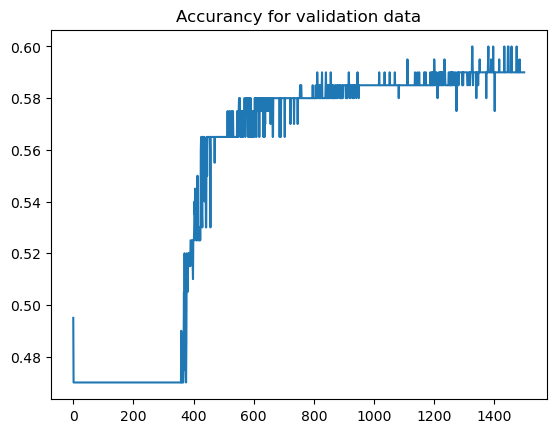

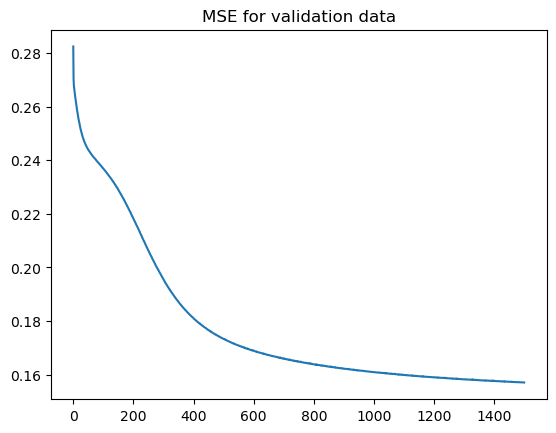

In [22]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))

plt.plot(acc_val/train_design.shape[0])
plt.title("Accurancy for validation data")
plt.show()

plt.plot(mse)
plt.title("MSE for validation data")
plt.show()

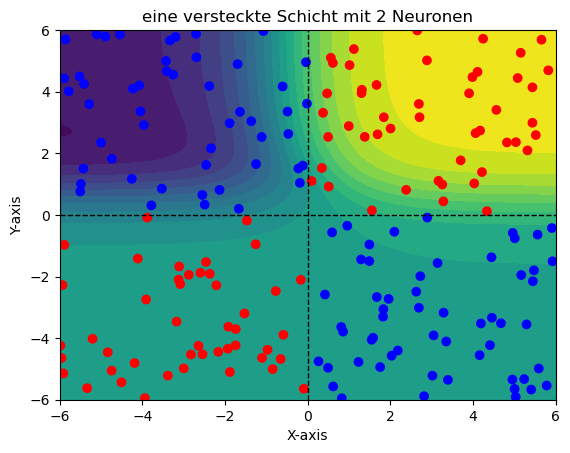

In [23]:
# def sigmoid_multi_dim(output_matrix):
#     for i in range(output_matrix.shape[1]):
#         output_matrix[:,i] = sigmoid(output_matrix[:,i])
#     return output_matrix
    

# # hidden layer 1
# output_hid_l1 = np.dot(grid_design, weights[0].T)
# output_hid_l1 = sigmoid_multi_dim(output_hid_l1)

# # output layer
# output = np.dot(output_hid_l1, weights[1].T)
# output = sigmoid_multi_dim(output)
# output = output.reshape((100,100))

output = feedforward(grid_design.T).reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=20, cmap='viridis')
plot_uniform(train_data, train_labels, "eine versteckte Schicht mit 2 Neuronen")

Experiment 2: eine versteckte Schicht mit 3 Neuronen

In [24]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                    # Lernrate
no_hidden = 3                # Anzahl versteckter Neuronen
epochs = 1500                # Anzahl Epochen
sizes = [2, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(3, 2)
(1, 3)


In [25]:
acc_val, mse = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 2.344416479572877
Epoch 0: 106.0 / 200
	Loss 1: 2.3140758673703097
Epoch 1: 106.0 / 200
	Loss 2: 2.2404289967259716
Epoch 2: 106.0 / 200
	Loss 3: 1.9138181393377118
Epoch 3: 106.0 / 200
	Loss 4: 0.38828756838293754
Epoch 4: 147.0 / 200
	Loss 5: 0.24370332784034646
Epoch 5: 94.0 / 200
	Loss 6: 0.23738125872407032
Epoch 6: 94.0 / 200
	Loss 7: 0.23523049031879872
Epoch 7: 94.0 / 200
	Loss 8: 0.2340366593025912
Epoch 8: 94.0 / 200
	Loss 9: 0.2328460008981169
Epoch 9: 94.0 / 200
	Loss 10: 0.23186744021562128
Epoch 10: 94.0 / 200
	Loss 11: 0.23060765770158398
Epoch 11: 94.0 / 200
	Loss 12: 0.2297091122379185
Epoch 12: 94.0 / 200
	Loss 13: 0.22850330928399462
Epoch 13: 94.0 / 200
	Loss 14: 0.2277558461296418
Epoch 14: 94.0 / 200
	Loss 15: 0.22638457581688237
Epoch 15: 94.0 / 200
	Loss 16: 0.22540941922001767
Epoch 16: 94.0 / 200
	Loss 17: 0.22431024134384342
Epoch 17: 94.0 / 200
	Loss 18: 0.2232705059845695
Epoch 18: 94.0 / 200
	Loss 19: 0.222303165973997
Epoch 19: 94.0 / 200
	Loss 2

	Loss 175: 0.050058950012686426
Epoch 175: 115.0 / 200
	Loss 176: 0.04983401922188145
Epoch 176: 113.0 / 200
	Loss 177: 0.04974691910572024
Epoch 177: 112.0 / 200
	Loss 178: 0.04931930275122198
Epoch 178: 116.0 / 200
	Loss 179: 0.04909495088487392
Epoch 179: 116.0 / 200
	Loss 180: 0.04884451931672519
Epoch 180: 115.0 / 200
	Loss 181: 0.04861552963385288
Epoch 181: 116.0 / 200
	Loss 182: 0.04839574533861824
Epoch 182: 116.0 / 200
	Loss 183: 0.04823190043236744
Epoch 183: 114.0 / 200
	Loss 184: 0.04798148425811638
Epoch 184: 124.0 / 200
	Loss 185: 0.047776693738531835
Epoch 185: 118.0 / 200
	Loss 186: 0.047687383691134906
Epoch 186: 133.0 / 200
	Loss 187: 0.04760401882107123
Epoch 187: 112.0 / 200
	Loss 188: 0.04722404964357132
Epoch 188: 130.0 / 200
	Loss 189: 0.04702152563121558
Epoch 189: 128.0 / 200
	Loss 190: 0.04687335524499723
Epoch 190: 130.0 / 200
	Loss 191: 0.04688796093673806
Epoch 191: 140.0 / 200
	Loss 192: 0.04680182397688084
Epoch 192: 141.0 / 200
	Loss 193: 0.046373427626

	Loss 353: 0.03877037875716921
Epoch 353: 148.0 / 200
	Loss 354: 0.038778090739484905
Epoch 354: 146.0 / 200
	Loss 355: 0.03887073463073862
Epoch 355: 146.0 / 200
	Loss 356: 0.03900827434710993
Epoch 356: 144.0 / 200
	Loss 357: 0.03872375108503409
Epoch 357: 150.0 / 200
	Loss 358: 0.03876625162547621
Epoch 358: 152.0 / 200
	Loss 359: 0.038709384340411705
Epoch 359: 147.0 / 200
	Loss 360: 0.03869479116611516
Epoch 360: 146.0 / 200
	Loss 361: 0.03959193414762194
Epoch 361: 154.0 / 200
	Loss 362: 0.03869439658976345
Epoch 362: 152.0 / 200
	Loss 363: 0.038651760752729664
Epoch 363: 151.0 / 200
	Loss 364: 0.038637285856651216
Epoch 364: 151.0 / 200
	Loss 365: 0.038621338820440526
Epoch 365: 151.0 / 200
	Loss 366: 0.03878261278738611
Epoch 366: 146.0 / 200
	Loss 367: 0.0386195829005867
Epoch 367: 151.0 / 200
	Loss 368: 0.03863398091386516
Epoch 368: 146.0 / 200
	Loss 369: 0.0385927314644222
Epoch 369: 151.0 / 200
	Loss 370: 0.038868874273681076
Epoch 370: 153.0 / 200
	Loss 371: 0.03853657758

	Loss 529: 0.037307287134553
Epoch 529: 147.0 / 200
	Loss 530: 0.037243021917925695
Epoch 530: 153.0 / 200
	Loss 531: 0.037206662177206765
Epoch 531: 148.0 / 200
	Loss 532: 0.03716785450855627
Epoch 532: 151.0 / 200
	Loss 533: 0.037167149988016186
Epoch 533: 151.0 / 200
	Loss 534: 0.037162531745336645
Epoch 534: 150.0 / 200
	Loss 535: 0.037145123318814255
Epoch 535: 151.0 / 200
	Loss 536: 0.03716951734468928
Epoch 536: 152.0 / 200
	Loss 537: 0.03722512882297292
Epoch 537: 153.0 / 200
	Loss 538: 0.037158741488136096
Epoch 538: 152.0 / 200
	Loss 539: 0.037713772230161445
Epoch 539: 145.0 / 200
	Loss 540: 0.03713780021084858
Epoch 540: 152.0 / 200
	Loss 541: 0.037176114152402455
Epoch 541: 148.0 / 200
	Loss 542: 0.037107112998654705
Epoch 542: 150.0 / 200
	Loss 543: 0.03715059297423187
Epoch 543: 148.0 / 200
	Loss 544: 0.03709285267928197
Epoch 544: 151.0 / 200
	Loss 545: 0.03708917789080846
Epoch 545: 151.0 / 200
	Loss 546: 0.03722036943881529
Epoch 546: 153.0 / 200
	Loss 547: 0.03720496

	Loss 707: 0.03649189261016119
Epoch 707: 155.0 / 200
	Loss 708: 0.03635765402530679
Epoch 708: 152.0 / 200
	Loss 709: 0.03643464840108159
Epoch 709: 148.0 / 200
	Loss 710: 0.03663031625326911
Epoch 710: 156.0 / 200
	Loss 711: 0.036385744074915065
Epoch 711: 154.0 / 200
	Loss 712: 0.03636770043056388
Epoch 712: 150.0 / 200
	Loss 713: 0.03663337386081174
Epoch 713: 147.0 / 200
	Loss 714: 0.03634248517814718
Epoch 714: 150.0 / 200
	Loss 715: 0.03635210617602281
Epoch 715: 154.0 / 200
	Loss 716: 0.03684160327581269
Epoch 716: 146.0 / 200
	Loss 717: 0.03656882771901047
Epoch 717: 156.0 / 200
	Loss 718: 0.03637251533639455
Epoch 718: 149.0 / 200
	Loss 719: 0.03656230663712394
Epoch 719: 147.0 / 200
	Loss 720: 0.03636824211112797
Epoch 720: 154.0 / 200
	Loss 721: 0.03634262755379205
Epoch 721: 150.0 / 200
	Loss 722: 0.03631441334641349
Epoch 722: 151.0 / 200
	Loss 723: 0.03655253209787245
Epoch 723: 147.0 / 200
	Loss 724: 0.036319874886483666
Epoch 724: 150.0 / 200
	Loss 725: 0.0368486424181

	Loss 885: 0.03584893054740159
Epoch 885: 154.0 / 200
	Loss 886: 0.03584974740542623
Epoch 886: 154.0 / 200
	Loss 887: 0.03587366192337601
Epoch 887: 155.0 / 200
	Loss 888: 0.03584423368487161
Epoch 888: 154.0 / 200
	Loss 889: 0.035850140520609364
Epoch 889: 153.0 / 200
	Loss 890: 0.035922953734341505
Epoch 890: 155.0 / 200
	Loss 891: 0.03616145130537478
Epoch 891: 157.0 / 200
	Loss 892: 0.03616178946546537
Epoch 892: 157.0 / 200
	Loss 893: 0.03582951068373138
Epoch 893: 154.0 / 200
	Loss 894: 0.03583924183755194
Epoch 894: 153.0 / 200
	Loss 895: 0.03585625619286684
Epoch 895: 152.0 / 200
	Loss 896: 0.035861652823271924
Epoch 896: 155.0 / 200
	Loss 897: 0.035947049152262815
Epoch 897: 156.0 / 200
	Loss 898: 0.03583347345284374
Epoch 898: 153.0 / 200
	Loss 899: 0.03599211895770952
Epoch 899: 148.0 / 200
	Loss 900: 0.03589248870744264
Epoch 900: 156.0 / 200
	Loss 901: 0.03584606826366008
Epoch 901: 154.0 / 200
	Loss 902: 0.035839772447925355
Epoch 902: 151.0 / 200
	Loss 903: 0.0358071644

	Loss 1062: 0.035489466102518456
Epoch 1062: 153.0 / 200
	Loss 1063: 0.035485714045867874
Epoch 1063: 154.0 / 200
	Loss 1064: 0.03564143340519376
Epoch 1064: 157.0 / 200
	Loss 1065: 0.035549512824426685
Epoch 1065: 156.0 / 200
	Loss 1066: 0.035586892065565784
Epoch 1066: 151.0 / 200
	Loss 1067: 0.03570234576641496
Epoch 1067: 157.0 / 200
	Loss 1068: 0.03548340497119625
Epoch 1068: 155.0 / 200
	Loss 1069: 0.035486229368402754
Epoch 1069: 153.0 / 200
	Loss 1070: 0.035503667368043716
Epoch 1070: 156.0 / 200
	Loss 1071: 0.0354710765208345
Epoch 1071: 153.0 / 200
	Loss 1072: 0.03547208071858793
Epoch 1072: 153.0 / 200
	Loss 1073: 0.035468897597535666
Epoch 1073: 154.0 / 200
	Loss 1074: 0.035480509829942886
Epoch 1074: 153.0 / 200
	Loss 1075: 0.03554374069464814
Epoch 1075: 151.0 / 200
	Loss 1076: 0.03562532097116927
Epoch 1076: 157.0 / 200
	Loss 1077: 0.035702767085991696
Epoch 1077: 150.0 / 200
	Loss 1078: 0.03549975496020421
Epoch 1078: 151.0 / 200
	Loss 1079: 0.03545668168206897
Epoch 10

	Loss 1241: 0.03520777068810725
Epoch 1241: 156.0 / 200
	Loss 1242: 0.03539540938722162
Epoch 1242: 157.0 / 200
	Loss 1243: 0.03520414544277422
Epoch 1243: 156.0 / 200
	Loss 1244: 0.0352259459334418
Epoch 1244: 152.0 / 200
	Loss 1245: 0.035330524124058335
Epoch 1245: 151.0 / 200
	Loss 1246: 0.03527512560088805
Epoch 1246: 156.0 / 200
	Loss 1247: 0.035194232195135726
Epoch 1247: 156.0 / 200
	Loss 1248: 0.03518873304803255
Epoch 1248: 155.0 / 200
	Loss 1249: 0.03518381339562495
Epoch 1249: 156.0 / 200
	Loss 1250: 0.03522685641628587
Epoch 1250: 152.0 / 200
	Loss 1251: 0.035214241265017404
Epoch 1251: 152.0 / 200
	Loss 1252: 0.035206327669814755
Epoch 1252: 152.0 / 200
	Loss 1253: 0.03518707537087641
Epoch 1253: 154.0 / 200
	Loss 1254: 0.03524049899582309
Epoch 1254: 156.0 / 200
	Loss 1255: 0.03525743213352202
Epoch 1255: 151.0 / 200
	Loss 1256: 0.035316035584582926
Epoch 1256: 157.0 / 200
	Loss 1257: 0.035474824102775006
Epoch 1257: 157.0 / 200
	Loss 1258: 0.03539461354828184
Epoch 1258:

	Loss 1421: 0.03493662940060623
Epoch 1421: 155.0 / 200
	Loss 1422: 0.03496357264004674
Epoch 1422: 156.0 / 200
	Loss 1423: 0.03525378389936201
Epoch 1423: 150.0 / 200
	Loss 1424: 0.034933469228877065
Epoch 1424: 155.0 / 200
	Loss 1425: 0.03494351066166829
Epoch 1425: 155.0 / 200
	Loss 1426: 0.035132030374200915
Epoch 1426: 157.0 / 200
	Loss 1427: 0.03493129565638251
Epoch 1427: 155.0 / 200
	Loss 1428: 0.03494211265326773
Epoch 1428: 156.0 / 200
	Loss 1429: 0.035032252322830845
Epoch 1429: 156.0 / 200
	Loss 1430: 0.03494187209627648
Epoch 1430: 156.0 / 200
	Loss 1431: 0.03492231749614799
Epoch 1431: 155.0 / 200
	Loss 1432: 0.03492365802827378
Epoch 1432: 156.0 / 200
	Loss 1433: 0.03491951981043998
Epoch 1433: 155.0 / 200
	Loss 1434: 0.034931930938627655
Epoch 1434: 155.0 / 200
	Loss 1435: 0.03502179731283159
Epoch 1435: 156.0 / 200
	Loss 1436: 0.03493035075473623
Epoch 1436: 155.0 / 200
	Loss 1437: 0.03492038974147777
Epoch 1437: 155.0 / 200
	Loss 1438: 0.03493658109992893
Epoch 1438: 

Test accuracy: 153 / 200
Test loss: 0.050017345457330394


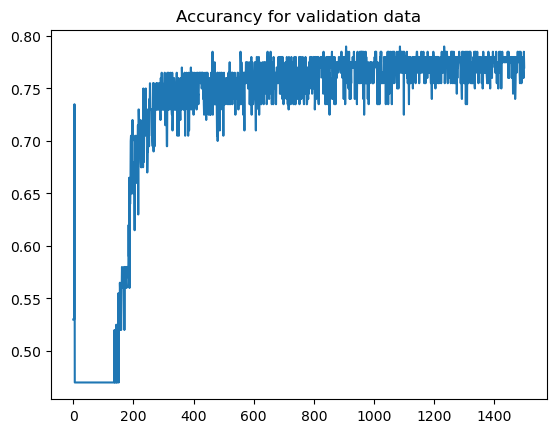

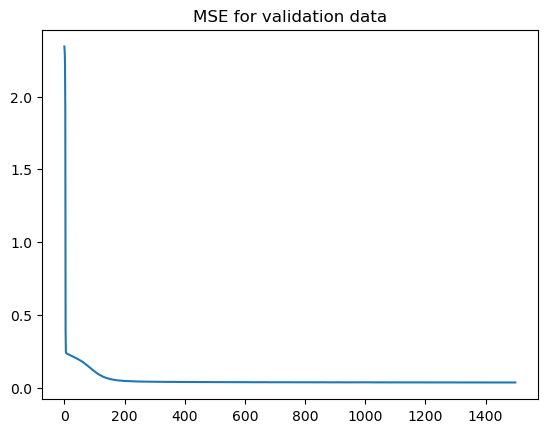

In [26]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))

plt.plot(acc_val/train_design.shape[0])
plt.title("Accurancy for validation data")
plt.show()

plt.plot(mse)
plt.title("MSE for validation data")
plt.show()

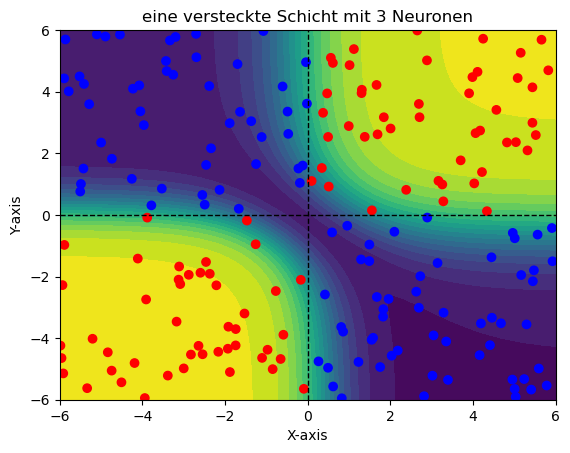

In [27]:
# # hidden layer 1
# output_hid_l1 = np.dot(grid_design, weights[0].T)
# output_hid_l1 = sigmoid_multi_dim(output_hid_l1)

# # output layer
# output = np.dot(output_hid_l1, weights[1].T)
# output = sigmoid_multi_dim(output)
# output = output.reshape((100,100))

output = feedforward(grid_design.T).reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=20, cmap='viridis')
plot_uniform(train_data, train_labels, "eine versteckte Schicht mit 3 Neuronen")

Experiment 3: zwei versteckte Schichten

In [28]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                    # Lernrate
no_hidden_1 = 3              # Anzahl versteckter Neuronen
no_hidden_2 = 2
epochs = 1500                 # Anzahl Epochen
sizes = [2, no_hidden_1, no_hidden_2, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(3, 2)
(2, 3)
(1, 2)


In [29]:
acc_val, mse = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 0.22352786801555574
Epoch 0: 94.0 / 200
	Loss 1: 0.21774137038328767
Epoch 1: 94.0 / 200
	Loss 2: 0.21660481232849763
Epoch 2: 94.0 / 200
	Loss 3: 0.2155542905977866
Epoch 3: 94.0 / 200
	Loss 4: 0.2148681083403779
Epoch 4: 94.0 / 200
	Loss 5: 0.21408962282947258
Epoch 5: 94.0 / 200
	Loss 6: 0.21337329942342032
Epoch 6: 94.0 / 200
	Loss 7: 0.21272873408920737
Epoch 7: 94.0 / 200
	Loss 8: 0.21201455218134982
Epoch 8: 94.0 / 200
	Loss 9: 0.21143357099465804
Epoch 9: 94.0 / 200
	Loss 10: 0.21062392142833214
Epoch 10: 94.0 / 200
	Loss 11: 0.20987655014376116
Epoch 11: 94.0 / 200
	Loss 12: 0.20920107230998541
Epoch 12: 94.0 / 200
	Loss 13: 0.2085016720580595
Epoch 13: 94.0 / 200
	Loss 14: 0.207797468156278
Epoch 14: 94.0 / 200
	Loss 15: 0.207104924937382
Epoch 15: 94.0 / 200
	Loss 16: 0.2064064391555419
Epoch 16: 94.0 / 200
	Loss 17: 0.20568713641031178
Epoch 17: 94.0 / 200
	Loss 18: 0.20501580512978884
Epoch 18: 94.0 / 200
	Loss 19: 0.20421854648616755
Epoch 19: 94.0 / 200
	Loss 20

	Loss 172: 0.14927348733591714
Epoch 172: 115.0 / 200
	Loss 173: 0.14926544881268872
Epoch 173: 113.0 / 200
	Loss 174: 0.14935498868292535
Epoch 174: 113.0 / 200
	Loss 175: 0.14914658409841816
Epoch 175: 115.0 / 200
	Loss 176: 0.14912900471402446
Epoch 176: 113.0 / 200
	Loss 177: 0.1490291540095887
Epoch 177: 115.0 / 200
	Loss 178: 0.14898212504235855
Epoch 178: 115.0 / 200
	Loss 179: 0.1489235020021776
Epoch 179: 116.0 / 200
	Loss 180: 0.14887541024866072
Epoch 180: 115.0 / 200
	Loss 181: 0.14883406141307376
Epoch 181: 117.0 / 200
	Loss 182: 0.1487844090375687
Epoch 182: 117.0 / 200
	Loss 183: 0.14874190873841264
Epoch 183: 117.0 / 200
	Loss 184: 0.14870090824760576
Epoch 184: 117.0 / 200
	Loss 185: 0.14866679241856595
Epoch 185: 117.0 / 200
	Loss 186: 0.14860747145266845
Epoch 186: 117.0 / 200
	Loss 187: 0.1485481411958873
Epoch 187: 115.0 / 200
	Loss 188: 0.14853518207200056
Epoch 188: 117.0 / 200
	Loss 189: 0.14845889603897622
Epoch 189: 116.0 / 200
	Loss 190: 0.14850070890238762
E

	Loss 345: 0.14383783344582018
Epoch 345: 116.0 / 200
	Loss 346: 0.14385295576970064
Epoch 346: 116.0 / 200
	Loss 347: 0.14379770975610506
Epoch 347: 117.0 / 200
	Loss 348: 0.14385957353369563
Epoch 348: 118.0 / 200
	Loss 349: 0.14377157832206244
Epoch 349: 116.0 / 200
	Loss 350: 0.14376809520108597
Epoch 350: 116.0 / 200
	Loss 351: 0.1437167617191708
Epoch 351: 118.0 / 200
	Loss 352: 0.14377698898100444
Epoch 352: 118.0 / 200
	Loss 353: 0.143677406762406
Epoch 353: 118.0 / 200
	Loss 354: 0.14365678910557658
Epoch 354: 116.0 / 200
	Loss 355: 0.14363174088011224
Epoch 355: 116.0 / 200
	Loss 356: 0.14361469392660328
Epoch 356: 116.0 / 200
	Loss 357: 0.14362867417360803
Epoch 357: 118.0 / 200
	Loss 358: 0.1435770476635759
Epoch 358: 116.0 / 200
	Loss 359: 0.14354908278514045
Epoch 359: 117.0 / 200
	Loss 360: 0.14354701126363134
Epoch 360: 118.0 / 200
	Loss 361: 0.1435259853447411
Epoch 361: 118.0 / 200
	Loss 362: 0.1434973534246604
Epoch 362: 118.0 / 200
	Loss 363: 0.1434723598604139
Epoc

	Loss 514: 0.14108102650127743
Epoch 514: 117.0 / 200
	Loss 515: 0.14112497987869474
Epoch 515: 117.0 / 200
	Loss 516: 0.14107995027845938
Epoch 516: 117.0 / 200
	Loss 517: 0.14111634049672184
Epoch 517: 117.0 / 200
	Loss 518: 0.1410075817995019
Epoch 518: 117.0 / 200
	Loss 519: 0.1410067209425608
Epoch 519: 119.0 / 200
	Loss 520: 0.141039336114402
Epoch 520: 122.0 / 200
	Loss 521: 0.14097866008700094
Epoch 521: 119.0 / 200
	Loss 522: 0.14095694177568702
Epoch 522: 118.0 / 200
	Loss 523: 0.14097550692014152
Epoch 523: 120.0 / 200
	Loss 524: 0.14095179360084228
Epoch 524: 117.0 / 200
	Loss 525: 0.1409319165680866
Epoch 525: 117.0 / 200
	Loss 526: 0.14090552333522022
Epoch 526: 117.0 / 200
	Loss 527: 0.14089714379712176
Epoch 527: 117.0 / 200
	Loss 528: 0.14093131926397381
Epoch 528: 122.0 / 200
	Loss 529: 0.14089303456193336
Epoch 529: 120.0 / 200
	Loss 530: 0.14085634465198782
Epoch 530: 117.0 / 200
	Loss 531: 0.14087421077937867
Epoch 531: 117.0 / 200
	Loss 532: 0.1408661078089627
Epo

	Loss 685: 0.13922498012354587
Epoch 685: 121.0 / 200
	Loss 686: 0.13924811862502076
Epoch 686: 120.0 / 200
	Loss 687: 0.13928808741606338
Epoch 687: 120.0 / 200
	Loss 688: 0.1392028912641818
Epoch 688: 121.0 / 200
	Loss 689: 0.13918606228172187
Epoch 689: 121.0 / 200
	Loss 690: 0.13918005540213982
Epoch 690: 121.0 / 200
	Loss 691: 0.1391841427756899
Epoch 691: 120.0 / 200
	Loss 692: 0.13916674389855951
Epoch 692: 121.0 / 200
	Loss 693: 0.1391550844030226
Epoch 693: 121.0 / 200
	Loss 694: 0.13915737888666146
Epoch 694: 121.0 / 200
	Loss 695: 0.13913915997708465
Epoch 695: 121.0 / 200
	Loss 696: 0.13914998825262198
Epoch 696: 120.0 / 200
	Loss 697: 0.13912258154388465
Epoch 697: 121.0 / 200
	Loss 698: 0.13910336054396244
Epoch 698: 121.0 / 200
	Loss 699: 0.13909739675548338
Epoch 699: 121.0 / 200
	Loss 700: 0.1390886499052012
Epoch 700: 121.0 / 200
	Loss 701: 0.13907647794054814
Epoch 701: 121.0 / 200
	Loss 702: 0.13907232580719683
Epoch 702: 121.0 / 200
	Loss 703: 0.1390842793511714
Ep

	Loss 855: 0.13781039511091045
Epoch 855: 123.0 / 200
	Loss 856: 0.13777454054686541
Epoch 856: 122.0 / 200
	Loss 857: 0.13777032249300494
Epoch 857: 122.0 / 200
	Loss 858: 0.1377801298843717
Epoch 858: 122.0 / 200
	Loss 859: 0.1378365091261187
Epoch 859: 122.0 / 200
	Loss 860: 0.13773984844389153
Epoch 860: 122.0 / 200
	Loss 861: 0.1377751277958913
Epoch 861: 122.0 / 200
	Loss 862: 0.13775334775400347
Epoch 862: 123.0 / 200
	Loss 863: 0.1377814121870675
Epoch 863: 124.0 / 200
	Loss 864: 0.1377344378539935
Epoch 864: 123.0 / 200
	Loss 865: 0.13770943494103552
Epoch 865: 123.0 / 200
	Loss 866: 0.137698366703464
Epoch 866: 122.0 / 200
	Loss 867: 0.13768299985907606
Epoch 867: 123.0 / 200
	Loss 868: 0.13767553710699412
Epoch 868: 123.0 / 200
	Loss 869: 0.1376709950092575
Epoch 869: 122.0 / 200
	Loss 870: 0.13766760846051634
Epoch 870: 123.0 / 200
	Loss 871: 0.13768858596177502
Epoch 871: 123.0 / 200
	Loss 872: 0.1377521071267191
Epoch 872: 125.0 / 200
	Loss 873: 0.1376544297699834
Epoch 8

	Loss 1023: 0.1361767059981328
Epoch 1023: 125.0 / 200
	Loss 1024: 0.13609551305901263
Epoch 1024: 123.0 / 200
	Loss 1025: 0.13608371089044144
Epoch 1025: 123.0 / 200
	Loss 1026: 0.13607104031228565
Epoch 1026: 123.0 / 200
	Loss 1027: 0.13607573158234004
Epoch 1027: 122.0 / 200
	Loss 1028: 0.1360472176104468
Epoch 1028: 124.0 / 200
	Loss 1029: 0.1360648049265964
Epoch 1029: 122.0 / 200
	Loss 1030: 0.13605143915298418
Epoch 1030: 122.0 / 200
	Loss 1031: 0.13600681111648286
Epoch 1031: 124.0 / 200
	Loss 1032: 0.1359770699766978
Epoch 1032: 123.0 / 200
	Loss 1033: 0.1359720035997242
Epoch 1033: 123.0 / 200
	Loss 1034: 0.13594715327781046
Epoch 1034: 123.0 / 200
	Loss 1035: 0.13593019170547316
Epoch 1035: 124.0 / 200
	Loss 1036: 0.13593309584608673
Epoch 1036: 124.0 / 200
	Loss 1037: 0.13589826963251236
Epoch 1037: 124.0 / 200
	Loss 1038: 0.13594484642355018
Epoch 1038: 124.0 / 200
	Loss 1039: 0.1358669803025333
Epoch 1039: 124.0 / 200
	Loss 1040: 0.13586462140328873
Epoch 1040: 123.0 / 20

	Loss 1190: 0.11492732482656014
Epoch 1190: 126.0 / 200
	Loss 1191: 0.11390553691745403
Epoch 1191: 125.0 / 200
	Loss 1192: 0.11325494950703177
Epoch 1192: 108.0 / 200
	Loss 1193: 0.11190882997424202
Epoch 1193: 123.0 / 200
	Loss 1194: 0.11082502168972093
Epoch 1194: 121.0 / 200
	Loss 1195: 0.10987735177850035
Epoch 1195: 124.0 / 200
	Loss 1196: 0.10864509292684461
Epoch 1196: 120.0 / 200
	Loss 1197: 0.1076234353561966
Epoch 1197: 110.0 / 200
	Loss 1198: 0.10627978117055434
Epoch 1198: 121.0 / 200
	Loss 1199: 0.10524745608758863
Epoch 1199: 124.0 / 200
	Loss 1200: 0.10382010632471857
Epoch 1200: 122.0 / 200
	Loss 1201: 0.102511811455275
Epoch 1201: 121.0 / 200
	Loss 1202: 0.10123994499687214
Epoch 1202: 122.0 / 200
	Loss 1203: 0.09988809456191416
Epoch 1203: 118.0 / 200
	Loss 1204: 0.09858774509587252
Epoch 1204: 122.0 / 200
	Loss 1205: 0.09792564770217407
Epoch 1205: 107.0 / 200
	Loss 1206: 0.09599166174299725
Epoch 1206: 109.0 / 200
	Loss 1207: 0.09452566762523298
Epoch 1207: 116.0 /

	Loss 1354: 0.04854601907196777
Epoch 1354: 152.0 / 200
	Loss 1355: 0.04855229061683604
Epoch 1355: 148.0 / 200
	Loss 1356: 0.048360373957302354
Epoch 1356: 152.0 / 200
	Loss 1357: 0.04831674159435461
Epoch 1357: 152.0 / 200
	Loss 1358: 0.04860574292143979
Epoch 1358: 147.0 / 200
	Loss 1359: 0.04806462116439457
Epoch 1359: 152.0 / 200
	Loss 1360: 0.047974398286880486
Epoch 1360: 152.0 / 200
	Loss 1361: 0.048221599317485354
Epoch 1361: 147.0 / 200
	Loss 1362: 0.04792207713974373
Epoch 1362: 149.0 / 200
	Loss 1363: 0.04768545263934805
Epoch 1363: 152.0 / 200
	Loss 1364: 0.04758540632761772
Epoch 1364: 152.0 / 200
	Loss 1365: 0.04758943655592297
Epoch 1365: 149.0 / 200
	Loss 1366: 0.04740597938561267
Epoch 1366: 152.0 / 200
	Loss 1367: 0.04744271221745452
Epoch 1367: 149.0 / 200
	Loss 1368: 0.047263753258305424
Epoch 1368: 153.0 / 200
	Loss 1369: 0.047137557624156105
Epoch 1369: 153.0 / 200
	Loss 1370: 0.04719949318046893
Epoch 1370: 153.0 / 200
	Loss 1371: 0.0469308956912611
Epoch 1371: 

Test accuracy: 152 / 200
Test loss: 0.05358558159744056


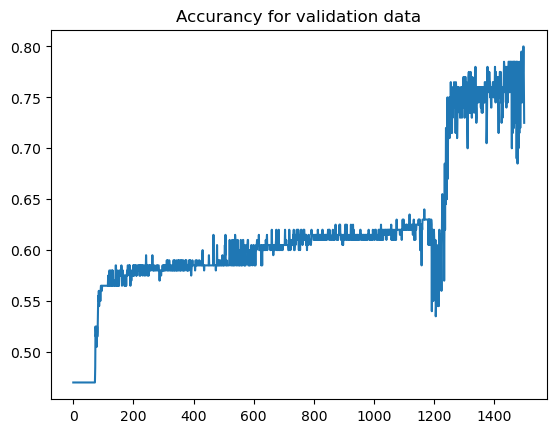

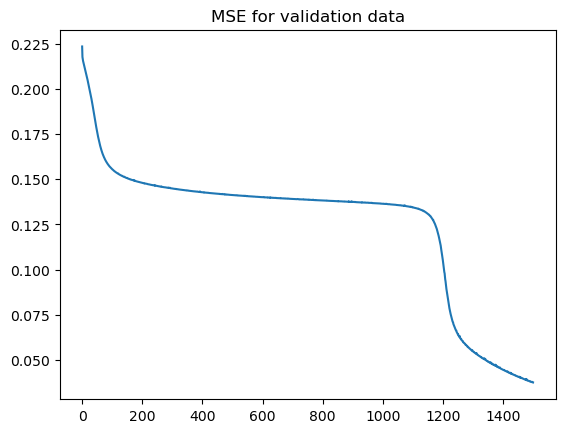

In [30]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))

plt.plot(acc_val/train_design.shape[0])
plt.title("Accurancy for validation data")
plt.show()

plt.plot(mse)
plt.title("MSE for validation data")
plt.show()

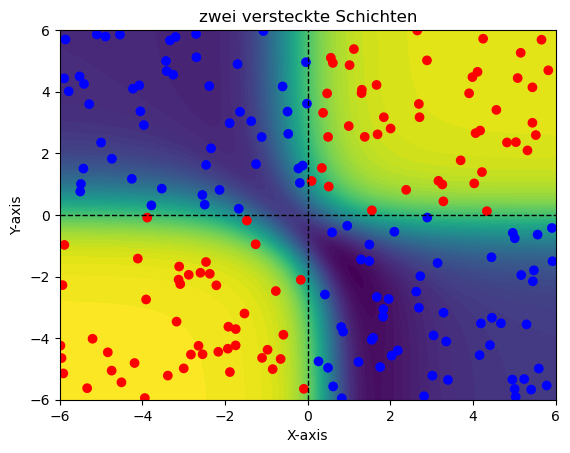

In [31]:
# # hidden layer 1
# output_hid_l1 = np.dot(grid_design, weights[0].T)
# output_hid_l1 = sigmoid_multi_dim(output_hid_l1)

# # hidden layer 2
# output_hid_l2 = np.dot(output_hid_l1, weights[1].T)
# output_hid_l2 = sigmoid_multi_dim(output_hid_l2)

# # output layer
# output = np.dot(output_hid_l2, weights[2].T)
# output = sigmoid_multi_dim(output)
# output = output.reshape((100,100))
output = feedforward(grid_design.T).reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=100, cmap='viridis')
plot_uniform(train_data, train_labels, "zwei versteckte Schichten")

# 4. Logistische Regression
Eine alternative, besser an das Klassifikationsszenario angepasste Kostenfunktion statt des MSE ist die Kostenfunktion für die logistische Regression:
$C = −y * log(a^L) − (1 − y) * log(1 − a^L)$.
Damit Sie diese in Ihrem Beispiel anwenden können, müssen Sie die Ableitung $∇a^L C$ berechnen und die Funktion cost_derivative() entsprechend abändern. Da die logistische Regression davon ausgeht, dass der Output des Netzes eine Wahrscheinlichkeit zwischen 0 und 1 ist, können wir hierfür nicht den tanh() als Aktivierungsfunktion verwenden. Machen Sie daher Ihre Änderungen aus Aufgabe 3 rückgängig, so dass Sie wieder eine sigmoide Aktivierungsfunktion haben. In der Funktion evaluate() sollte natürlich statt des MSE die Kostenfunktion der logistischen Regression ausgegeben werden, um zu überprüfen, ob tatsächlich ein Gradientenabstieg stattfindet. Weiterhin ist es nützlich, sowohl auf $C$ wie auf $∇a^L C$ die Funktion np.nan_to_num() anzuwenden, da hier zuweilen numerische Probleme auftreten können. Auch die Lernrate muss angepasst werden: $η = 1.0$ funktioniert hier deutlich besser.

In [32]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

def cost_logistic_regression(y_pred, y):
    C = -y * np.nan_to_num(np.log(y_pred)) - (1 - y) * np.nan_to_num(np.log(1 - y_pred))
    return C

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return np.nan_to_num(- y / output_activations + (1 - y) / (1 - output_activations))

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    y_arr = []
    ypred_arr = []
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        ypred_arr.append(ypred[0][0])
        y_arr.append(y)
        
        if y <= 0.5:
            c = 0
        else:
            c = 1
        
        if ypred <= 0.5:
            cpred = 0
        else:
            cpred = 1
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        if c == cpred:
            correct += 1
    
    y_arr = np.array(y_arr)
    ypred_arr = np.array(ypred_arr)
    print(y_arr, ypred_arr)
    C = np.mean(cost_logistic_regression(ypred_arr, y_arr))
    
    return correct, C

In [33]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 1.0                   # Lernrate
no_hidden = 2                # Anzahl versteckter Neuronen
epochs = 1500                 # Anzahl Epochen
sizes = [2, no_hidden, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(2, 2)
(2, 2)
(1, 2)


In [34]:
acc_val, loglikes = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.5659688  0.56604002 0.56700277 0.55496851 0.55994634 0.55315831
 0.54656259 0.54792939 0.55898298 0.56598539 0.555174   0.56542784
 0.55805475 0.56675384 0.54547927 0.56613614 0.54744364 0.55785296
 0.56360758 0.56699462 0.56339371 0.55603682 0.56074225 0.56701105
 0.54551701 0.55892753 0.54546707 0.56699734 0.56701626 0.55890362
 0.55314359 0.56669195 0.55806906 0.55457618 0.54536027 0.54908479
 0.55524639 0.5669036  0.55174446 0.5541249  0.56678729 0.56222362
 0.56596882 0.55534907 0.55689469 0.55524945 0.56425915 0.56686547
 0.54523631 0.5654835  0.56215597 0.54681205 0.55303477 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.42647161 0.42650966 0.42687468 0.42073133 0.4224108  0.4189372
 0.41030591 0.41153171 0.42152405 0.42652622 0.42099706 0.42631989
 0.42099326 0.42678563 0.4087414  0.42656437 0.41146389 0.42074485
 0.42518183 0.42687186 0.42536822 0.42157863 0.42380538 0.42687729
 0.40878253 0.42147834 0.40867225 0.42687303 0.42687915 0.42147077
 0.41892855 0.42676584 0.42091408 0.42044158 0.4085395  0.41334674
 0.42104246 0.4268414  0.41668105 0.41974751 0.42679837 0.42440165
 0.42648268 0.4211048  0.42215035 0.42103956 0.42558593 0.42682652
 0.40839411 0.42632979 0.42491581 0.4105468  0.418673   0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.5428433  0.54295024 0.54326312 0.53071534 0.52735334 0.52202759
 0.45943685 0.46438126 0.52219156 0.54322752 0.53209697 0.54311624
 0.52093301 0.5431984  0.44712189 0.54312353 0.46802292 0.51910593
 0.53951963 0.54326151 0.54152316 0.53387213 0.53726375 0.54326125
 0.44732903 0.52195149 0.44615621 0.54326526 0.54326331 0.52199192
 0.52200861 0.54321305 0.51993458 0.529702   0.44530996 0.48064901
 0.53222064 0.54325923 0.50527695 0.52551073 0.54321359 0.5375042
 0.54293559 0.53238153 0.53558937 0.53219051 0.54079247 0.54323339
 0.4444791  0.54305587 0.54136867 0.46051428 0.52005856 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.05012429 0.04561272 0.02510005 0.96148812 0.95475934 0.93805479
 0.04422345 0.05395092 0.95750584 0.0402464  0.96227841 0.05801142
 0.95672218 0.02867035 0.03770222 0.03957283 0.05444572 0.95492768
 0.60154612 0.02520043 0.42036394 0.96171963 0.91210343 0.02504224
 0.03780549 0.95745793 0.03748808 0.02512656 0.02496582 0.95748225
 0.93784988 0.02921687 0.95598316 0.96030948 0.03716838 0.10293315
 0.96230979 0.02615563 0.69877104 0.95330092 0.02805946 0.85232899
 0.04774026 0.96232755 0.95852095 0.96229794 0.35278434 0.02690613
 0.03684693 0.05830676 0.64751034 0.04567633 0.92872926 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00486838 0.00455352 0.00324543 0.94671193 0.96172255 0.75755494
 0.00565244 0.00617814 0.96015818 0.00415489 0.9519175  0.00525179
 0.9529244  0.00346907 0.00533417 0.00413977 0.00613054 0.9472158
 0.23948646 0.00325166 0.06957622 0.95753164 0.89011915 0.00324213
 0.00533974 0.95974233 0.00532527 0.0032468  0.0032373  0.95966322
 0.75518948 0.00350004 0.95128986 0.93804747 0.00530868 0.0081569
 0.9526315  0.00330955 0.07060364 0.89596727 0.00343009 0.77102613
 0.00468953 0.9535317  0.95658245 0.95259387 0.05536289 0.00335789
 0.00529173 0.00529543 0.23224138 0.00572963 0.67493526 0.9

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00651693 0.00577955 0.00323288 0.98363506 0.98252253 0.97083095
 0.00665919 0.00766805 0.98152421 0.00491763 0.98410577 0.00750494
 0.98015451 0.00360465 0.0059094  0.00488259 0.00792347 0.978421
 0.73703705 0.00324286 0.36548438 0.98419784 0.96942944 0.00322758
 0.00591947 0.98139003 0.00588287 0.00323511 0.00321988 0.98139665
 0.97072304 0.00365869 0.97942776 0.98302226 0.00585067 0.01477392
 0.98413824 0.00333678 0.59252276 0.97925967 0.00353792 0.94796123
 0.00609404 0.98417366 0.98338112 0.98413135 0.29067707 0.00341639
 0.00581927 0.00761531 0.73635123 0.00681434 0.96440748 0.9

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00398086 0.00369291 0.00266517 0.98425326 0.98446771 0.97086721
 0.00721877 0.00813039 0.98381218 0.0033023  0.98446034 0.00410075
 0.98234302 0.00283289 0.00655069 0.00332668 0.00833318 0.98072386
 0.48996588 0.00266974 0.08527108 0.98395528 0.95728503 0.00266311
 0.00655976 0.98368823 0.00652749 0.00266584 0.00265946 0.98368478
 0.97073939 0.00285203 0.98171188 0.98375388 0.00649869 0.01404055
 0.98446395 0.00271053 0.5049951  0.98018853 0.00280259 0.92117451
 0.00380002 0.98445922 0.98188059 0.98446431 0.09204638 0.0027484
 0.00647056 0.00416764 0.29201001 0.00735883 0.96353482 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00470764 0.00414037 0.00233433 0.98295378 0.98302749 0.96771923
 0.00554642 0.00621025 0.98151581 0.00347306 0.98352297 0.00531541
 0.97982351 0.00258638 0.0050674  0.00346886 0.00636234 0.97793315
 0.81017849 0.002341   0.41152269 0.98385784 0.97354516 0.00233095
 0.00507379 0.98135892 0.00505103 0.00233567 0.00232576 0.98135925
 0.96758244 0.00262137 0.97906059 0.98220571 0.00503083 0.01062845
 0.98357414 0.00240318 0.46673418 0.97790479 0.00254039 0.95965357
 0.00437057 0.98363549 0.98335595 0.98356666 0.35411564 0.00245779
 0.00501117 0.00542179 0.77856536 0.00564788 0.95976325 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00274918 0.00256835 0.00192042 0.97093699 0.97436589 0.92485552
 0.00550263 0.00599669 0.97274692 0.00232864 0.9721669  0.00285517
 0.9695035  0.00202402 0.0051899  0.0023391  0.00602434 0.96654809
 0.40990238 0.00192322 0.06504881 0.97287445 0.94044274 0.0019191
 0.00519449 0.97251212 0.00518038 0.00192087 0.00191688 0.97248823
 0.92431997 0.00203654 0.96848113 0.96891642 0.0051664  0.00853066
 0.97230547 0.00194859 0.18007579 0.95789454 0.0020053  0.89321079
 0.00263772 0.97247337 0.97105251 0.97229633 0.06456239 0.00197171
 0.00515256 0.00289434 0.260055   0.00557546 0.89947046 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00276404 0.00257623 0.00190833 0.97560516 0.97614642 0.95380279
 0.00567079 0.00627802 0.97512272 0.00233166 0.97618858 0.00289266
 0.97305422 0.00201323 0.00526511 0.00233965 0.00637512 0.97089454
 0.46307778 0.00191116 0.07994449 0.97613441 0.94857478 0.00190698
 0.00527059 0.97495444 0.0052521  0.00190881 0.00190475 0.97494747
 0.95358775 0.00202631 0.97223382 0.97464113 0.00523507 0.01003901
 0.97623554 0.00193691 0.37105797 0.96883868 0.00199426 0.90859699
 0.00264942 0.97628619 0.97433174 0.97623064 0.07541894 0.00196018
 0.00521844 0.0029318  0.32495906 0.00576145 0.94232357 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00254686 0.00243595 0.0020291  0.98177341 0.98097457 0.97627812
 0.00836571 0.00970987 0.98161741 0.00228005 0.98144022 0.00257969
 0.98094256 0.00209677 0.00741061 0.00229188 0.01014014 0.98003228
 0.20953069 0.00203094 0.02309496 0.97984476 0.93005166 0.0020283
 0.00742226 0.98156463 0.00737844 0.00202935 0.00202682 0.98156489
 0.97622646 0.0021042  0.98057732 0.98179968 0.00734136 0.02117984
 0.98137073 0.00204723 0.78715412 0.98039878 0.00208449 0.85469946
 0.00247651 0.98126653 0.97598265 0.98138018 0.02625972 0.00206262
 0.00730576 0.0026062  0.08388795 0.00856889 0.97312448 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00405231 0.0037613  0.00276463 0.98645422 0.98647829 0.97862304
 0.01022289 0.01143427 0.9860081  0.00337595 0.98659972 0.00418964
 0.98509712 0.0029193  0.00938747 0.0033976  0.01173219 0.98408036
 0.63990945 0.00276877 0.12260855 0.98632802 0.97144834 0.00276275
 0.00939802 0.98592847 0.00936016 0.00276526 0.00275945 0.98592726
 0.97855226 0.00293753 0.98469341 0.98614389 0.00932701 0.02010587
 0.98660348 0.00280608 0.67161196 0.98397442 0.00289105 0.95156188
 0.00387014 0.98660274 0.98515149 0.98660313 0.12959239 0.00284077
 0.00929502 0.00425677 0.43279694 0.01040518 0.97452357 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.0023436  0.00223018 0.00182005 0.97230919 0.97381634 0.94473545
 0.00579673 0.00634561 0.97316289 0.00207445 0.97279919 0.00238993
 0.97082282 0.00188643 0.00545196 0.0020843  0.00641037 0.96852198
 0.24155179 0.00182184 0.0281402  0.97223992 0.92434126 0.00181924
 0.00545661 0.97299005 0.00544151 0.00182031 0.00181782 0.97297561
 0.9444391  0.00189406 0.96999465 0.97121473 0.00542728 0.00958846
 0.97283418 0.00183787 0.28744828 0.96433388 0.00187436 0.85302601
 0.00227247 0.97286472 0.96891248 0.9728345  0.0304385  0.00185283
 0.00541338 0.00241604 0.11219471 0.00587716 0.92968646 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00269371 0.00255596 0.00205512 0.98156786 0.9807711  0.97291186
 0.00756742 0.00854024 0.98075863 0.00237179 0.98160896 0.00277562
 0.97978583 0.00213486 0.00689834 0.0023796  0.00881222 0.97856575
 0.31322384 0.00205726 0.04086424 0.98085182 0.94852434 0.00205411
 0.0069065  0.98067452 0.00687662 0.00205547 0.00205242 0.9806757
 0.97283491 0.00214459 0.97929234 0.98130513 0.00685095 0.01601427
 0.9815887  0.00207671 0.66517834 0.9789034  0.00212039 0.89554303
 0.00260909 0.9815523  0.97858086 0.98159037 0.04027905 0.00209447
 0.00682632 0.00280496 0.18052331 0.00771353 0.96831969 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00259689 0.00244096 0.00189738 0.97424646 0.97403257 0.95874172
 0.00663471 0.00734266 0.97314738 0.00222909 0.97438745 0.00265493
 0.97122648 0.00198305 0.00613849 0.00224327 0.00754771 0.96896861
 0.34200073 0.00189967 0.04389606 0.97341405 0.93343918 0.00189636
 0.00614449 0.97297554 0.00612232 0.00189771 0.00189453 0.97297511
 0.95860216 0.00199285 0.97031612 0.97373271 0.00610341 0.01247636
 0.97437072 0.0019202  0.4718559  0.96949461 0.00196737 0.87982357
 0.00249845 0.97433508 0.97019865 0.97437306 0.04862568 0.00193953
 0.0060853  0.0026918  0.16852561 0.00674206 0.95025743 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00434081 0.00390568 0.0024951  0.98639502 0.98606319 0.97800405
 0.0094982  0.0104312  0.98499102 0.00337318 0.9866595  0.00471386
 0.98384691 0.00269571 0.00881497 0.00338141 0.01076902 0.98241657
 0.78881733 0.00250038 0.29857556 0.98665578 0.97725686 0.00249251
 0.00882289 0.9848753  0.00879225 0.00249608 0.00248838 0.98487944
 0.97793507 0.00272239 0.98324276 0.98602763 0.00876704 0.0176367
 0.98667623 0.00254922 0.60443012 0.98359009 0.00265887 0.96444223
 0.00407765 0.98669371 0.98603685 0.9866728  0.26690827 0.00259311
 0.00874308 0.00480221 0.71595826 0.00964179 0.9734506  0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00502636 0.0045459  0.00301679 0.99225271 0.99188381 0.99085449
 0.01437993 0.01718759 0.99179822 0.0039333  0.99222103 0.00527232
 0.99156663 0.00323819 0.01225015 0.00396505 0.01878781 0.99120599
 0.83459131 0.00302262 0.28096754 0.99195663 0.98517953 0.00301413
 0.01227222 0.99177177 0.01217817 0.00301769 0.0030095  0.99177452
 0.9908443  0.00326503 0.99140399 0.9922379  0.01210624 0.05127254
 0.99220964 0.00307545 0.94928268 0.99181863 0.00319722 0.97685617
 0.00472507 0.99219212 0.99133087 0.99221059 0.29087596 0.00312483
 0.01203898 0.00538493 0.69799442 0.01481304 0.99009086 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00244853 0.00228185 0.0017093  0.97342222 0.97537793 0.93640496
 0.00636294 0.00688976 0.97379645 0.00206362 0.97435949 0.00254463
 0.97089378 0.0017963  0.00604829 0.00207337 0.0069488  0.96801607
 0.38866691 0.00171161 0.05960789 0.97466746 0.94280067 0.00170823
 0.00605238 0.97357321 0.00603921 0.00170968 0.0017064  0.97355776
 0.93599074 0.00180697 0.96984877 0.97188781 0.00602681 0.01001749
 0.97445193 0.00173261 0.20620152 0.96288089 0.00178035 0.89486852
 0.00234545 0.9745602  0.97277544 0.97444435 0.05954564 0.00175197
 0.00601478 0.00258131 0.23914766 0.00643888 0.91513151 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00192275 0.00183993 0.0015541  0.97321407 0.97293304 0.9608252
 0.0065414  0.0072587  0.97294063 0.00172177 0.97252166 0.00192719
 0.9711023  0.00159994 0.00602724 0.00173367 0.00753023 0.9687296
 0.12590403 0.00155532 0.01437223 0.96933946 0.87098319 0.0015536
 0.00603303 0.97277731 0.00601052 0.00155423 0.00155261 0.97277831
 0.96070623 0.0016046  0.97013372 0.9732409  0.00599216 0.01304551
 0.97238768 0.00156603 0.48126223 0.97021551 0.00159145 0.74768258
 0.00186861 0.97218772 0.96126322 0.97240916 0.01809858 0.00157658
 0.00597479 0.00194893 0.0406744  0.00665096 0.95295771 0.97

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00225479 0.00212642 0.00168252 0.97822044 0.97760791 0.96430242
 0.00645918 0.00719632 0.9772104  0.00195344 0.97824136 0.00230824
 0.97556361 0.00175113 0.00596576 0.00196418 0.00741878 0.97353231
 0.25013163 0.00168434 0.03371155 0.9770562  0.92806402 0.0016817
 0.00597147 0.9770661  0.00595036 0.00168278 0.00168025 0.97706661
 0.96417254 0.00175914 0.97474621 0.97784002 0.00593252 0.01289695
 0.97820875 0.00170074 0.46540422 0.97415681 0.00173851 0.8536835
 0.00217412 0.97815173 0.9735058  0.97821272 0.03629386 0.00171616
 0.00591555 0.00233812 0.12388731 0.00656913 0.95626374 0.9

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00206739 0.0019477  0.001529   0.98175682 0.98052617 0.97346667
 0.00676345 0.007782   0.98078715 0.0017916  0.98172673 0.00214666
 0.97987868 0.00159267 0.0060972  0.00179707 0.00810381 0.97863872
 0.2717722  0.00153068 0.03982139 0.98077443 0.94142273 0.0015282
 0.00610476 0.98070873 0.00607664 0.00152928 0.00152686 0.98071159
 0.97339226 0.00160068 0.97937172 0.98156034 0.00605302 0.01646986
 0.98169423 0.00154612 0.65994996 0.97929964 0.00158102 0.87363454
 0.00199417 0.98164058 0.97814596 0.98169692 0.03812342 0.00156022
 0.0060306  0.00217181 0.16786553 0.00691364 0.96887205 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00287005 0.00262456 0.00184567 0.98537723 0.98544631 0.97679144
 0.00746325 0.00859547 0.98512722 0.00230642 0.9854776  0.0029696
 0.98419045 0.00195842 0.00677199 0.00232636 0.00886059 0.98315099
 0.57565994 0.00184862 0.10690548 0.98504609 0.96578478 0.00184435
 0.0067801  0.98504939 0.00675157 0.00184609 0.001842   0.98504712
 0.97671    0.0019717  0.98378618 0.98507247 0.00672661 0.01765099
 0.98547442 0.00187526 0.64052881 0.98277918 0.00193743 0.93998766
 0.00271448 0.98546345 0.9834947  0.98547539 0.1170357  0.00190055
 0.00670276 0.00302908 0.35914049 0.00762625 0.97216904 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00366501 0.00324069 0.0019604  0.99006073 0.98983718 0.98554921
 0.00754213 0.00894006 0.98958355 0.00273245 0.99016055 0.00400501
 0.98905529 0.00213161 0.00667976 0.00274399 0.00935468 0.98842172
 0.79922051 0.00196483 0.30889204 0.99002559 0.98164022 0.00195826
 0.00668945 0.98953557 0.00665407 0.00196119 0.00195478 0.98953617
 0.98551028 0.00215436 0.98879734 0.98987904 0.00662403 0.02196774
 0.99016327 0.00200586 0.80377965 0.98859449 0.00209971 0.97005152
 0.00340526 0.99016348 0.98940881 0.99016246 0.28543098 0.00204333
 0.00659553 0.0040967  0.71485465 0.00774329 0.98322477 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00277042 0.00253604 0.00179151 0.98381354 0.98386499 0.97227924
 0.00728636 0.00841282 0.98352652 0.00223581 0.98397679 0.00288558
 0.98236337 0.00189825 0.00662238 0.00225198 0.00865418 0.98107496
 0.51092552 0.0017943  0.10245786 0.98351015 0.95891744 0.00179024
 0.00663015 0.98343224 0.00660326 0.00179194 0.00178802 0.98342905
 0.97216624 0.00191119 0.98186814 0.98339635 0.0065795  0.01749865
 0.98397772 0.00181962 0.5659143  0.98037104 0.0018784  0.92401344
 0.00262322 0.98397053 0.98167571 0.98397818 0.10710534 0.00184343
 0.00655681 0.0029407  0.33236028 0.0074464  0.96596425 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00245949 0.00228707 0.00173618 0.98034998 0.98051396 0.9672686
 0.00716929 0.00829713 0.98034947 0.00205646 0.98026699 0.00249783
 0.97891148 0.00181765 0.00649409 0.00207525 0.00857943 0.9772792
 0.35854281 0.00173831 0.05583088 0.97895998 0.93292067 0.00173526
 0.0065018  0.98023422 0.00647447 0.00173645 0.00173355 0.98022985
 0.9671386  0.00182666 0.97828264 0.9800217  0.00645079 0.01791536
 0.98022861 0.00175734 0.5400528  0.97670989 0.00180243 0.87362915
 0.0023482  0.98016456 0.97516833 0.98023569 0.06659149 0.00177583
 0.00642827 0.00254187 0.17458662 0.00733027 0.95976607 0.9

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00214438 0.00199615 0.00151647 0.98353277 0.98344199 0.97196351
 0.00617421 0.00730182 0.98361799 0.00180339 0.9835703  0.0022111
 0.98257246 0.00158642 0.00555126 0.00181461 0.0075097  0.98141166
 0.38483064 0.00151831 0.06408671 0.98272553 0.94568585 0.00151565
 0.00555854 0.98354161 0.00553402 0.00151675 0.00151419 0.98353721
 0.97184474 0.00159478 0.98214067 0.98317947 0.00551199 0.0171443
 0.98355255 0.00153489 0.5908952  0.98025293 0.00157342 0.89088743
 0.00205104 0.98351845 0.98004238 0.98355594 0.06845174 0.00155053
 0.00549093 0.00224616 0.22535696 0.00633007 0.96558383 0.9

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.0020339  0.00188929 0.00142286 0.98105972 0.982192   0.95494686
 0.00434862 0.00492255 0.98187459 0.00170266 0.98151427 0.00210493
 0.98005526 0.00149041 0.00405144 0.00171272 0.00497479 0.97824801
 0.38200713 0.00142463 0.0673658  0.98115545 0.94190662 0.00142205
 0.00405508 0.9817473  0.00404366 0.00142313 0.00142065 0.98173534
 0.95464303 0.00149859 0.97942196 0.98009007 0.00403282 0.00925622
 0.98154989 0.00144067 0.35362565 0.97395158 0.00147786 0.88306935
 0.0019432  0.98158397 0.97859614 0.98154921 0.07049988 0.00145574
 0.00402237 0.00213871 0.23429013 0.00442642 0.93990691 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00359787 0.00328176 0.00228062 0.98964927 0.98937803 0.98125778
 0.00805866 0.00953698 0.98936727 0.00288625 0.98974212 0.00380236
 0.98860004 0.00242138 0.00723988 0.0029012  0.00985982 0.98770025
 0.55257963 0.00228429 0.15461038 0.98932731 0.96709822 0.00227889
 0.00724914 0.98930731 0.00721725 0.00228123 0.002276   0.98930578
 0.9811727  0.00243928 0.98825532 0.98937479 0.00718917 0.02349456
 0.98973773 0.00231791 0.65568754 0.98723295 0.00239523 0.93142294
 0.00340238 0.9897253  0.98785533 0.98973826 0.15094963 0.00234901
 0.00716246 0.0038728  0.4229284  0.00826292 0.97646456 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00295967 0.00270708 0.00189327 0.98997146 0.9893038  0.98234537
 0.00555231 0.00662802 0.98940598 0.00239945 0.99006495 0.00318433
 0.98871313 0.00200672 0.00495807 0.00240313 0.00690093 0.98782698
 0.54062625 0.00189623 0.16026616 0.98967051 0.96716392 0.00189182
 0.00496459 0.98935026 0.00494164 0.00189383 0.0018895  0.98935076
 0.98227056 0.00202206 0.98836473 0.98972602 0.00492176 0.01823726
 0.99005935 0.00192371 0.68556842 0.98773825 0.00198576 0.92774634
 0.0028074  0.99004548 0.98830911 0.99005925 0.14167671 0.00194845
 0.00490294 0.00323485 0.45863915 0.00570031 0.97799382 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00421323 0.00383505 0.00264744 0.99284137 0.99267848 0.98606967
 0.00746024 0.00893808 0.9927999  0.00336145 0.99289466 0.00444536
 0.99225941 0.00281374 0.00669349 0.00338101 0.00920321 0.99163734
 0.59908535 0.00265176 0.18940533 0.99252901 0.97271183 0.00264542
 0.00670218 0.9927611  0.00667315 0.00264815 0.002642   0.99275917
 0.98599632 0.00283471 0.99202899 0.99263378 0.00664705 0.0238482
 0.99288942 0.00269136 0.70431661 0.99098304 0.00278278 0.93978515
 0.00397839 0.99287713 0.99127276 0.99289034 0.18758939 0.00272817
 0.00662218 0.00453106 0.47120184 0.00765893 0.98208313 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00461927 0.00416974 0.00277939 0.99485213 0.99462953 0.99069315
 0.00675294 0.00836009 0.99481247 0.00361577 0.99486815 0.00492391
 0.99449325 0.00297063 0.00594989 0.0036351  0.00865435 0.99411073
 0.66528035 0.00278435 0.24701022 0.9945755  0.97973344 0.00277705
 0.00595884 0.99479066 0.00592897 0.00278023 0.00277315 0.99478965
 0.99064845 0.00299522 0.99435176 0.99473352 0.00590213 0.02697429
 0.99486152 0.00282995 0.79693791 0.99371447 0.00293499 0.95393848
 0.00434147 0.99484892 0.99365335 0.9948624  0.23957074 0.0028721
 0.00587661 0.00502426 0.55595041 0.00696483 0.98827513 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.0026587  0.00247159 0.00186128 0.98804992 0.9894174  0.95793898
 0.00315639 0.00357288 0.98987353 0.00223105 0.98847426 0.00276305
 0.98868709 0.00194956 0.00297425 0.00224233 0.0035597  0.98759975
 0.42712926 0.00186359 0.09250281 0.98819575 0.94257555 0.00186021
 0.00297658 0.98981038 0.0029701  0.00186165 0.00185839 0.98979808
 0.95752038 0.00196048 0.98835867 0.98703881 0.00296339 0.00668539
 0.9885173  0.00188462 0.42555103 0.9809027  0.00193317 0.87136426
 0.00254227 0.98856175 0.98571669 0.98851811 0.09360272 0.00190424
 0.00295688 0.00280546 0.29853581 0.00320923 0.94019618 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00238807 0.00224441 0.00177076 0.98401084 0.98492242 0.95680581
 0.00311201 0.00362599 0.98645734 0.00205427 0.98401899 0.00244579
 0.98528987 0.00184073 0.00288897 0.00206631 0.0036203  0.9841676
 0.33592846 0.00177259 0.05606403 0.98239302 0.89497794 0.00176994
 0.00289175 0.98640892 0.00288385 0.00177103 0.00176849 0.98639465
 0.95644609 0.00184897 0.98496309 0.98323333 0.00287582 0.00798165
 0.98399644 0.00178912 0.51688033 0.97755116 0.00182771 0.79266232
 0.00229734 0.98394636 0.97667647 0.98400697 0.06147179 0.00180482
 0.00286805 0.00247998 0.19779027 0.00317669 0.94146515 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.0045354  0.0041123  0.00280566 0.99344385 0.99411793 0.97803689
 0.00425426 0.00505546 0.99447146 0.00357913 0.99362112 0.00475552
 0.99390517 0.00298726 0.00392252 0.00360626 0.00502078 0.99338904
 0.59482145 0.00281037 0.21014904 0.99337092 0.9650553  0.00280351
 0.00392671 0.99444369 0.00391518 0.0028064  0.00279979 0.99443734
 0.97781475 0.00300964 0.99375387 0.99294973 0.00390317 0.01188836
 0.99363784 0.00285324 0.60792968 0.98989265 0.00295328 0.9185716
 0.00426984 0.99365301 0.991847   0.99363918 0.21587715 0.00289361
 0.00389152 0.00485527 0.47290276 0.00435306 0.96863212 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.0027001  0.00253356 0.0019894  0.9910572  0.99071123 0.9816923
 0.00395029 0.0050481  0.99229079 0.00231325 0.99073121 0.00276374
 0.9919515  0.00206914 0.00349791 0.00232764 0.00506481 0.99155151
 0.38170485 0.00199148 0.06621314 0.98901248 0.90667663 0.00198847
 0.0035033  0.99229104 0.00348761 0.00198969 0.00198682 0.99228532
 0.98156434 0.00207849 0.99184618 0.99096098 0.00347201 0.01772057
 0.99066838 0.00201025 0.72055593 0.98912627 0.00205426 0.80931372
 0.00259463 0.99057101 0.98407385 0.99067959 0.07344041 0.00202815
 0.003457   0.00280375 0.22922795 0.00408384 0.97601457 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00177933 0.00168141 0.00135939 0.98944865 0.98975376 0.9714871
 0.00202693 0.00244166 0.99162756 0.00155072 0.989152   0.00181338
 0.99109255 0.00140689 0.00186151 0.00155973 0.00242159 0.99055672
 0.30367325 0.00136063 0.03825299 0.98713868 0.88029401 0.00135884
 0.00186357 0.99162321 0.00185792 0.00135956 0.00135786 0.99161363
 0.97122331 0.0014124  0.99096509 0.98910203 0.00185203 0.00641158
 0.98909344 0.00137179 0.60712421 0.98574709 0.00139803 0.76676412
 0.00171714 0.98899742 0.9807349  0.98910758 0.04361711 0.00138248
 0.00184633 0.00183711 0.15580525 0.00207709 0.96064318 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00351529 0.00320836 0.00222905 0.99218095 0.99240681 0.97333319
 0.00351545 0.00438666 0.99347356 0.00283189 0.99237573 0.00376742
 0.99302137 0.00236421 0.00319328 0.00283916 0.00429536 0.99257741
 0.53301676 0.00223255 0.19298964 0.99196925 0.94264871 0.00222735
 0.00319741 0.99346389 0.00318673 0.00222969 0.00222461 0.99345793
 0.97305094 0.00238229 0.9929089  0.99157725 0.00317507 0.01252425
 0.99239257 0.00226503 0.6463219  0.987932   0.00233909 0.86255772
 0.00332894 0.99240506 0.98979613 0.99239454 0.17603874 0.00229458
 0.00316371 0.00383081 0.46533271 0.0036174  0.96247281 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.28174529e-03 1.21029874e-03 9.77600339e-04 9.85142810e-01
 9.87386032e-01 9.40831022e-01 1.47297500e-03 1.72186587e-03
 9.89687117e-01 1.11573525e-03 9.85225492e-01 1.30851626e-03
 9.88739174e-01 1.01150399e-03 1.38208490e-03 1.12197882e-03
 1.68691499e-03 9.87946929e-01 3.09943958e-01 9.78482065e-04
 3.40888147e-02 9.83398587e-01 8.60947347e-01 9.77209447e-04
 1.38328778e-03 9.89672622e-01 1.38031353e-03 9.77725919e-04
 9.76507294e-04 9.89655226e-01 9.40158400e-01 1.01548277e-03
 9.88579705e-01 9.83855417e-01 1.37694537e-03 3.68000957e-03
 9.85229770e-01 9.86441961e-04 5.06351302e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.12103703e-03 1.05670037e-03 8.48427650e-04 9.87754314e-01
 9.90028558e-01 9.41405757e-01 1.11931026e-03 1.29843992e-03
 9.91948035e-01 9.71943036e-04 9.87931236e-01 1.14594685e-03
 9.91145632e-01 8.78567815e-04 1.05576997e-03 9.77424634e-04
 1.26937425e-03 9.90492645e-01 3.15891712e-01 8.49210198e-04
 3.38429157e-02 9.86559126e-01 8.68880474e-01 8.48079775e-04
 1.05662040e-03 9.91936647e-01 1.05457388e-03 8.48540008e-04
 8.47456994e-04 9.91921680e-01 9.40659280e-01 8.82124617e-04
 9.91022635e-01 9.86451502e-01 1.05220618e-03 2.66301432e-03
 9.87954060e-01 8.56283739e-04 4.78476007e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00259087 0.00237488 0.00169542 0.99503164 0.99499984 0.98338374
 0.00270259 0.00351994 0.99596281 0.00210712 0.99505625 0.0027434
 0.99575712 0.00178883 0.0024208  0.00211559 0.00341907 0.99553884
 0.54768045 0.00169783 0.16739827 0.99451549 0.94170742 0.00169427
 0.00242437 0.9959654  0.00241531 0.00169583 0.00169238 0.99596179
 0.98319681 0.001801   0.99571104 0.99471889 0.00240531 0.01251967
 0.99505245 0.00172007 0.71827951 0.99262005 0.00177138 0.85876514
 0.00245807 0.99503976 0.99239863 0.99505576 0.15851649 0.00174061
 0.00239558 0.00279049 0.45765773 0.00279477 0.97624158 0.

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00137604 0.00129494 0.00103327 0.99466415 0.99456152 0.9842619
 0.00173363 0.00227466 0.996003   0.00118916 0.99444904 0.00141223
 0.99588604 0.00107072 0.00155389 0.00119535 0.00219731 0.9957458
 0.39426776 0.00103424 0.0476055  0.99315471 0.89958867 0.00103283
 0.00155618 0.99601729 0.00155049 0.00103342 0.00103206 0.99601304
 0.98408598 0.00107524 0.99587487 0.99449058 0.00154411 0.00858485
 0.99441052 0.00104305 0.73277777 0.99278138 0.00106371 0.79949425
 0.00132499 0.99434795 0.98882838 0.99441962 0.0518591  0.00105141
 0.00153789 0.00143136 0.22731374 0.00179352 0.97778497 0.9

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00217487 0.00198484 0.00138152 0.99534464 0.99543861 0.97768134
 0.00171599 0.00217302 0.99636976 0.00175901 0.995528   0.00237231
 0.99616608 0.0014625  0.00156791 0.00175817 0.00208965 0.99595288
 0.56398255 0.0013836  0.20608612 0.99534809 0.94823907 0.00138047
 0.00156986 0.99637288 0.00156525 0.00138193 0.00137885 0.99636972
 0.97737146 0.00147395 0.99612424 0.99483271 0.00155986 0.00664462
 0.99554917 0.0014032  0.67858986 0.9918809  0.00144745 0.85973489
 0.00206186 0.99557016 0.99391419 0.99555019 0.16981316 0.00142069
 0.00155459 0.00240795 0.52489296 0.00176639 0.96681043 0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.01673152e-03 9.57898870e-04 7.69734282e-04 9.93976258e-01
 9.94494037e-01 9.72771258e-01 9.17048755e-04 1.12468021e-03
 9.96005470e-01 8.80998267e-04 9.93842030e-01 1.04082319e-03
 9.95777101e-01 7.96496135e-04 8.48862892e-04 8.85785070e-04
 1.08803929e-03 9.95566418e-01 3.56832341e-01 7.70425092e-04
 3.59477605e-02 9.92499848e-01 8.75087882e-01 7.69425731e-04
 8.49755411e-04 9.96015711e-01 8.47632543e-04 7.69834883e-04
 7.68876726e-04 9.96009511e-01 9.72383294e-01 7.99693456e-04
 9.95754834e-01 9.93535064e-01 8.45162126e-04 3.09067928e-03
 9.93818305e-01 7.76689342e-04 6.31102820e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.27726207e-03 1.18012674e-03 8.73961044e-04 9.93535426e-01
 9.94527232e-01 9.57792349e-01 1.05721168e-03 1.28975566e-03
 9.95782873e-01 1.06005834e-03 9.93831286e-01 1.34918105e-03
 9.95461264e-01 9.15759457e-04 9.85083337e-04 1.06341419e-03
 1.23697649e-03 9.95185501e-01 4.91898394e-01 8.75035852e-04
 1.07007926e-01 9.93529076e-01 9.14264475e-01 8.73446973e-04
 9.86064413e-04 9.95786369e-01 9.83883922e-04 8.74149230e-04
 8.72603721e-04 9.95780045e-01 9.57135489e-01 9.21268976e-04
 9.95421753e-01 9.92574518e-01 9.81199820e-04 3.25164334e-03
 9.93873803e-01 8.84985319e-04 6.02755410e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [0.00156579 0.00143925 0.00105198 0.99511687 0.99575353 0.97270407
 0.00130306 0.00163801 0.9967192  0.00128101 0.99521395 0.00163713
 0.99648505 0.00110448 0.00119863 0.00128836 0.00156966 0.99628257
 0.54925562 0.00105332 0.13097993 0.99470159 0.92245428 0.00105136
 0.00120001 0.99672203 0.00119683 0.00105219 0.0010503  0.99671711
 0.97228547 0.00111109 0.99645539 0.99456018 0.00119304 0.00487533
 0.99522628 0.00106566 0.67047337 0.99116406 0.00109459 0.82939073
 0.0014867  0.99523324 0.99206572 0.99523092 0.13305946 0.00107727
 0.00118933 0.00166655 0.42831555 0.00133941 0.9586268  0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.18726977e-03 1.10331421e-03 8.44465073e-04 9.95672292e-01
 9.96005130e-01 9.79338929e-01 9.41806102e-04 1.19452045e-03
 9.97079853e-01 9.95734311e-04 9.95586530e-01 1.22293639e-03
 9.96914373e-01 8.80135020e-04 8.61916127e-04 1.00223876e-03
 1.14970884e-03 9.96758161e-01 4.72780762e-01 8.45379287e-04
 7.21290258e-02 9.94639428e-01 8.94690136e-01 8.44055826e-04
 8.62940180e-04 9.97086810e-01 8.60498346e-04 8.44599149e-04
 8.43330016e-04 9.97082487e-01 9.79027207e-01 8.84443310e-04
 9.96895948e-01 9.95349388e-01 8.57670159e-04 3.93320457e-03
 9.95570285e-01 8.53692283e-04 6.71902981e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.44805278e-03 1.31061126e-03 8.98265073e-04 9.95260371e-01
 9.96354027e-01 9.57726451e-01 9.56851302e-04 1.17031102e-03
 9.97105379e-01 1.14614295e-03 9.95608502e-01 1.55988041e-03
 9.96839284e-01 9.52031541e-04 8.94066134e-04 1.14967099e-03
 1.11601969e-03 9.96625476e-01 5.91940939e-01 8.99635473e-04
 2.11568625e-01 9.95660022e-01 9.41048829e-01 8.97602621e-04
 8.94926506e-04 9.97104611e-01 8.93084774e-04 8.98511706e-04
 8.96530485e-04 9.97099827e-01 9.56983286e-01 9.59293271e-04
 9.96807457e-01 9.94335464e-01 8.90749808e-04 2.96126423e-03
 9.95661323e-01 9.12394807e-04 6.17378523e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.01103596e-03 9.44418964e-04 7.34201796e-04 9.95096928e-01
 9.95209626e-01 9.73911947e-01 9.22391706e-04 1.19510497e-03
 9.96713857e-01 8.60555376e-04 9.95072231e-01 1.05289884e-03
 9.96606528e-01 7.63013045e-04 8.42868189e-04 8.63867349e-04
 1.13243950e-03 9.96482344e-01 4.52399914e-01 7.34940076e-04
 6.60660268e-02 9.94156230e-01 8.78618289e-01 7.33856287e-04
 8.43917566e-04 9.96729977e-01 8.41573043e-04 7.34324036e-04
 7.33274904e-04 9.96726017e-01 9.73496285e-01 7.66710882e-04
 9.96605355e-01 9.94633331e-01 8.38709584e-04 4.12246156e-03
 9.95065290e-01 7.41739682e-04 6.78586754e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [6.58839841e-04 6.24156322e-04 5.14636884e-04 9.95351092e-01
 9.95651470e-01 9.75618564e-01 5.46793528e-04 6.79204668e-04
 9.97168710e-01 5.78901139e-04 9.95141151e-01 6.72511594e-04
 9.97067439e-01 5.29945979e-04 5.07202522e-04 5.81783648e-04
 6.50453166e-04 9.96961713e-01 3.60245676e-01 5.15029099e-04
 2.43445286e-02 9.93638983e-01 8.53778181e-01 5.14462414e-04
 5.07720074e-04 9.97184791e-01 5.06547117e-04 5.14693386e-04
 5.14150719e-04 9.97180278e-01 9.75220698e-01 5.31778053e-04
 9.97072931e-01 9.95016596e-01 5.05132468e-04 2.03863144e-03
 9.95107749e-01 5.18590430e-04 6.83292229e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [8.02108497e-04 7.47647234e-04 5.78607399e-04 9.95870742e-01
 9.96209264e-01 9.71892021e-01 5.80024591e-04 7.27980234e-04
 9.97388945e-01 6.79207546e-04 9.95891012e-01 8.34238806e-04
 9.97265800e-01 6.01515816e-04 5.37129887e-04 6.82190274e-04
 6.93082403e-04 9.97143558e-01 4.56456671e-01 5.79192279e-04
 6.33144057e-02 9.95169812e-01 8.79047433e-01 5.78336026e-04
 5.37695718e-04 9.97399763e-01 5.36444352e-04 5.78702092e-04
 5.77874864e-04 9.97396034e-01 9.71390691e-01 6.04432868e-04
 9.97260341e-01 9.95384547e-01 5.34904959e-04 2.22540263e-03
 9.95892449e-01 5.84571880e-04 6.45796073e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.25588738e-03 1.14826793e-03 8.19656694e-04 9.97465983e-01
 9.97536368e-01 9.82029135e-01 7.78216259e-04 1.00376905e-03
 9.98221924e-01 1.01995315e-03 9.97553720e-01 1.35361923e-03
 9.98145358e-01 8.62450362e-04 7.14223233e-04 1.02139140e-03
 9.50371647e-04 9.98058903e-01 5.90565313e-01 8.20745114e-04
 1.88385830e-01 9.97347625e-01 9.35656878e-01 8.19121233e-04
 7.15058886e-04 9.98227972e-01 7.13206471e-04 8.19861303e-04
 8.18272865e-04 9.98226209e-01 9.81699086e-01 8.68377377e-04
 9.98136127e-01 9.97130503e-01 7.10934511e-04 3.50522158e-03
 9.97564471e-01 8.30940866e-04 7.02886375e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [4.21771141e-04 3.99003705e-04 3.28797077e-04 9.95881136e-01
 9.96763854e-01 9.64208576e-01 3.44902593e-04 4.14234881e-04
 9.97862768e-01 3.69354667e-04 9.95811609e-01 4.29389040e-04
 9.97726946e-01 3.38452684e-04 3.25093549e-04 3.71416381e-04
 3.96562395e-04 9.97618160e-01 3.63539277e-01 3.29043017e-04
 1.98106214e-02 9.94716943e-01 8.46965083e-01 3.28689293e-04
 3.25358565e-04 9.97871992e-01 3.24790223e-04 3.28831025e-04
 3.28493440e-04 9.97867573e-01 9.63508232e-01 3.39591357e-04
 9.97728324e-01 9.95334960e-01 3.24073419e-04 1.03137210e-03
 9.95805578e-01 3.31271015e-04 6.13495212e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [5.36605427e-04 5.04159880e-04 4.03171198e-04 9.96585680e-01
 9.96590768e-01 9.78244339e-01 3.95155909e-04 4.96463096e-04
 9.97771921e-01 4.63244140e-04 9.96528713e-01 5.55548874e-04
 9.97699333e-01 4.16817878e-04 3.65957788e-04 4.65049656e-04
 4.74019397e-04 9.97608150e-01 4.25749074e-01 4.03518585e-04
 4.00382131e-02 9.95679026e-01 8.63082410e-01 4.03010203e-04
 3.66332189e-04 9.97784364e-01 3.65485860e-04 4.03227287e-04
 4.02736327e-04 9.97781514e-01 9.77851586e-01 4.18557378e-04
 9.97698229e-01 9.96264154e-01 3.64466108e-04 1.63383736e-03
 9.96516428e-01 4.06716036e-04 6.70726530e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.11732936e-03 1.01174637e-03 7.06839430e-04 9.97527091e-01
 9.97882849e-01 9.79035452e-01 5.40481410e-04 6.74951336e-04
 9.98391471e-01 8.84591606e-04 9.97618665e-01 1.18571573e-03
 9.98271176e-01 7.45659484e-04 5.01991556e-04 8.89475331e-04
 6.44373938e-04 9.98164017e-01 6.36246803e-01 7.07818579e-04
 2.18738958e-01 9.97409483e-01 9.38439051e-01 7.06381438e-04
 5.02486059e-04 9.98393064e-01 5.01377727e-04 7.07001555e-04
 7.05611368e-04 9.98390667e-01 9.78629957e-01 7.50726185e-04
 9.98255461e-01 9.97162114e-01 5.00033532e-04 2.12323654e-03
 9.97630871e-01 7.16878175e-04 6.95654387e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [7.04578717e-04 6.45225903e-04 4.65866074e-04 9.97366304e-01
 9.97623544e-01 9.72513534e-01 4.62774342e-04 5.76664042e-04
 9.98278227e-01 5.75418366e-04 9.97529683e-01 7.62897008e-04
 9.98174342e-01 4.88762504e-04 4.31279443e-04 5.75684559e-04
 5.47700677e-04 9.98069119e-01 5.73626915e-01 4.66445178e-04
 1.67015322e-01 9.97442967e-01 9.29771560e-01 4.65577823e-04
 4.31692122e-04 9.98282646e-01 4.30801093e-04 4.65978118e-04
 4.65127749e-04 9.98280638e-01 9.71948030e-01 4.92002036e-04
 9.98160977e-01 9.96886371e-01 4.29686220e-04 1.73796713e-03
 9.97552185e-01 4.71899242e-04 6.57752271e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [4.80242402e-04 4.52966228e-04 3.70016325e-04 9.96812739e-01
 9.97018897e-01 9.80081765e-01 4.17897558e-04 5.41293477e-04
 9.98121175e-01 4.17909198e-04 9.96650821e-01 4.90741702e-04
 9.98075805e-01 3.81182371e-04 3.84658745e-04 4.20163674e-04
 5.10082527e-04 9.98022727e-01 4.31042345e-01 3.70299040e-04
 2.92036227e-02 9.95497143e-01 8.44300663e-01 3.69891002e-04
 3.85088241e-04 9.98133945e-01 3.84153569e-04 3.70056695e-04
 3.69666438e-04 9.98131097e-01 9.79702908e-01 3.82528255e-04
 9.98085798e-01 9.96563385e-01 3.82992919e-04 2.02926941e-03
 9.96625859e-01 3.72873151e-04 6.95487655e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [3.40752199e-04 3.24939110e-04 2.75778547e-04 9.93412305e-01
 9.94859994e-01 9.32502976e-01 2.27359387e-04 2.70679593e-04
 9.96973852e-01 3.04421634e-04 9.93327028e-01 3.47113991e-04
 9.96842313e-01 2.82471119e-04 2.15938427e-04 3.05707600e-04
 2.57681585e-04 9.96730268e-01 2.86516436e-01 2.75948174e-04
 1.20804219e-02 9.91424706e-01 7.77579808e-01 2.75702998e-04
 2.16094256e-04 9.96996695e-01 2.15781969e-04 2.75803099e-04
 2.75568367e-04 9.96990425e-01 9.31221443e-01 2.83281801e-04
 9.96866510e-01 9.92306163e-01 2.15365858e-04 6.34513773e-04
 9.93327317e-01 2.77494345e-04 5.82882045e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [5.23726298e-04 4.88637424e-04 3.82910351e-04 9.96140679e-01
 9.97127070e-01 9.46718251e-01 2.94462855e-04 3.55338592e-04
 9.98078037e-01 4.44977255e-04 9.96331028e-01 5.43984539e-04
 9.97951676e-01 3.96770816e-04 2.78685118e-04 4.46938770e-04
 3.36797050e-04 9.97848978e-01 4.94386764e-01 3.83260174e-04
 6.07626629e-02 9.95955801e-01 8.64294881e-01 3.82748685e-04
 2.78899732e-04 9.98086051e-01 2.78471706e-04 3.82966453e-04
 3.82472965e-04 9.98082482e-01 9.45591150e-01 3.98546452e-04
 9.97952187e-01 9.95275999e-01 2.77899431e-04 8.84144729e-04
 9.96365534e-01 3.86486072e-04 6.12015561e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [3.34536014e-04 3.17990954e-04 2.66653037e-04 9.96698699e-01
 9.96890411e-01 9.68601597e-01 2.35567841e-04 2.88546081e-04
 9.98162761e-01 2.96926062e-04 9.96629147e-01 3.43246632e-04
 9.98115362e-01 2.73532603e-04 2.21430372e-04 2.97977599e-04
 2.74230000e-04 9.98053220e-01 3.48079805e-01 2.66826963e-04
 1.75656001e-02 9.95603050e-01 8.15725364e-01 2.66573409e-04
 2.21615317e-04 9.98177208e-01 2.21224727e-04 2.66680229e-04
 2.66436079e-04 9.98174405e-01 9.67934659e-01 2.74400431e-04
 9.98125256e-01 9.96275450e-01 2.20727903e-04 8.25795957e-04
 9.96618184e-01 2.68425968e-04 6.47776597e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [3.50136544e-04 3.29435964e-04 2.65988614e-04 9.97291879e-01
 9.97336743e-01 9.75232809e-01 2.23110628e-04 2.77082244e-04
 9.98316678e-01 3.03757169e-04 9.97299132e-01 3.63854237e-04
 9.98267651e-01 2.74313963e-04 2.08692941e-04 3.04682490e-04
 2.63134232e-04 9.98201787e-01 4.43414290e-01 2.66198631e-04
 3.76330771e-02 9.96711276e-01 8.52680549e-01 2.65889800e-04
 2.08878211e-04 9.98327399e-01 2.08479115e-04 2.66023935e-04
 2.65724840e-04 9.98325329e-01 9.74707462e-01 2.75407067e-04
 9.98269545e-01 9.96936810e-01 2.07980352e-04 8.76848037e-04
 9.97298095e-01 2.68145909e-04 6.58246322e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [3.05879305e-04 2.89695512e-04 2.39671339e-04 9.96600327e-01
 9.97013556e-01 9.56215757e-01 2.03467963e-04 2.45849749e-04
 9.98188861e-01 2.69463708e-04 9.96677735e-01 3.16264899e-04
 9.98123796e-01 2.46270052e-04 1.92556678e-04 2.70233293e-04
 2.33298654e-04 9.98051083e-01 3.90664169e-01 2.39837737e-04
 2.41299640e-02 9.96045606e-01 8.27150957e-01 2.39593337e-04
 1.92701944e-04 9.98201635e-01 1.92407343e-04 2.39699056e-04
 2.39462556e-04 9.98198897e-01 9.55249723e-01 2.47132131e-04
 9.98130826e-01 9.95961799e-01 1.92019771e-04 6.42043111e-04
 9.96691203e-01 2.41379216e-04 6.25709459e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [8.70107018e-04 7.93168015e-04 5.60115024e-04 9.98854229e-01
 9.98714443e-01 9.89923435e-01 3.30735101e-04 4.31347570e-04
 9.99113420e-01 7.07257915e-04 9.98912558e-01 9.77501529e-04
 9.99096487e-01 5.88705375e-04 3.04399057e-04 7.03858452e-04
 4.06622753e-04 9.99058394e-01 6.34038740e-01 5.60832937e-04
 2.82870411e-01 9.98860412e-01 9.51758322e-01 5.59735159e-04
 3.04727925e-04 9.99117898e-01 3.04002046e-04 5.60275009e-04
 5.59184693e-04 9.99117638e-01 9.89706061e-01 5.93125838e-04
 9.99091741e-01 9.98689116e-01 3.03114863e-04 1.82143898e-03
 9.98919320e-01 5.67740822e-04 7.23762219e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [4.26465312e-04 3.96638089e-04 3.07182525e-04 9.97799452e-01
 9.98144049e-01 9.65218670e-01 2.14090482e-04 2.58940668e-04
 9.98747734e-01 3.60748676e-04 9.97937903e-01 4.50633302e-04
 9.98675589e-01 3.18547956e-04 2.02550247e-04 3.61513976e-04
 2.45980044e-04 9.98604916e-01 5.42673354e-01 3.07467624e-04
 8.98060112e-02 9.97796882e-01 8.95677574e-01 3.07044785e-04
 2.02701635e-04 9.98752822e-01 2.02390744e-04 3.07233848e-04
 3.06822096e-04 9.98751062e-01 9.64394534e-01 3.20104336e-04
 9.98671462e-01 9.97312344e-01 2.01986596e-04 6.93016296e-04
 9.97958723e-01 3.10136361e-04 6.45308115e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [4.46532234e-04 4.20231995e-04 3.41897206e-04 9.97646642e-01
 9.97859363e-01 9.75875891e-01 2.33470405e-04 2.89259938e-04
 9.98648181e-01 3.87239927e-04 9.97620903e-01 4.59638585e-04
 9.98595865e-01 3.52039905e-04 2.18953059e-04 3.88981181e-04
 2.74426187e-04 9.98539414e-01 5.02766716e-01 3.42151215e-04
 4.33286278e-02 9.96976627e-01 8.50093370e-01 3.41781815e-04
 2.19137982e-04 9.98656193e-01 2.18743270e-04 3.41936118e-04
 3.41581142e-04 9.98654127e-01 9.75337310e-01 3.53318377e-04
 9.98597982e-01 9.97333247e-01 2.18247222e-04 9.17394028e-04
 9.97616324e-01 3.44488121e-04 6.86751562e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.48698875e-04 2.35685019e-04 1.96421564e-04 9.97876818e-01
 9.98058867e-01 9.74101731e-01 1.49860525e-04 1.82807060e-04
 9.98811012e-01 2.19366150e-04 9.97870915e-01 2.55851781e-04
 9.98772329e-01 2.01516432e-04 1.41440152e-04 2.20142328e-04
 1.73538487e-04 9.98727055e-01 4.20938051e-01 1.96549153e-04
 2.21073807e-02 9.97315720e-01 8.35077411e-01 1.96362937e-04
 1.41548692e-04 9.98819070e-01 1.41322435e-04 1.96441730e-04
 1.96262352e-04 9.98817323e-01 9.73480586e-01 2.02168619e-04
 9.98776270e-01 9.97556105e-01 1.41032404e-04 5.33034457e-04
 9.97869838e-01 1.97726923e-04 6.54559518e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.13073890e-04 2.02174100e-04 1.69703399e-04 9.98494314e-01
 9.98632560e-01 9.83258847e-01 1.56247914e-04 1.92986340e-04
 9.99145162e-01 1.88421936e-04 9.98465788e-01 2.18159463e-04
 9.99117411e-01 1.73901362e-04 1.46903258e-04 1.89190905e-04
 1.82838887e-04 9.99086541e-01 4.52816995e-01 1.69808260e-04
 1.95471958e-02 9.98007636e-01 8.57774253e-01 1.69656092e-04
 1.47022444e-04 9.99150592e-01 1.46771471e-04 1.69719161e-04
 1.69573168e-04 9.99149314e-01 9.82848911e-01 1.74426673e-04
 9.99120248e-01 9.98299427e-01 1.46452708e-04 6.14154870e-04
 9.98461297e-01 1.70771946e-04 6.91373240e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.60742851e-04 2.46941745e-04 2.05584820e-04 9.97807412e-01
 9.97875452e-01 9.77297186e-01 1.54525330e-04 1.92105337e-04
 9.98704877e-01 2.29705886e-04 9.97776576e-01 2.68461875e-04
 9.98674328e-01 2.10902622e-04 1.45027318e-04 2.30508793e-04
 1.81769058e-04 9.98630783e-01 4.45851540e-01 2.05717615e-04
 2.54029488e-02 9.97141101e-01 8.30445189e-01 2.05523695e-04
 1.45147682e-04 9.98714175e-01 1.44893474e-04 2.05605912e-04
 2.05419067e-04 9.98712476e-01 9.76771351e-01 2.11586878e-04
 9.98679132e-01 9.97525738e-01 1.44571633e-04 6.36438775e-04
 9.97770611e-01 2.06945159e-04 6.73719218e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.33125147e-04 2.21381956e-04 1.86892115e-04 9.98065714e-01
 9.98300168e-01 9.79691623e-01 1.36617253e-04 1.68922080e-04
 9.98962403e-01 2.06411397e-04 9.97978232e-01 2.37242231e-04
 9.98931364e-01 1.91340311e-04 1.28545871e-04 2.07419264e-04
 1.59815865e-04 9.98898408e-01 4.40808446e-01 1.87002880e-04
 1.72884592e-02 9.97203966e-01 8.23827628e-01 1.86843472e-04
 1.28648434e-04 9.98969584e-01 1.28433966e-04 1.86907535e-04
 1.86755487e-04 9.98967872e-01 9.79201022e-01 1.91878207e-04
 9.98937214e-01 9.97844790e-01 1.28160256e-04 5.45903128e-04
 9.97965455e-01 1.88014162e-04 6.81344148e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.91890470e-04 2.73385113e-04 2.18371897e-04 9.98760293e-01
 9.98868196e-01 9.80242589e-01 1.39859847e-04 1.71363975e-04
 9.99258471e-01 2.51158992e-04 9.98818046e-01 3.06866654e-04
 9.99231776e-01 2.25241947e-04 1.32156605e-04 2.51635238e-04
 1.61940839e-04 9.99200198e-01 5.59504332e-01 2.18542946e-04
 7.16546252e-02 9.98688111e-01 9.02086929e-01 2.18289310e-04
 1.32255807e-04 9.99262491e-01 1.32053878e-04 2.18402663e-04
 2.18155791e-04 9.99261656e-01 9.79719931e-01 2.26188664e-04
 9.99231695e-01 9.98516613e-01 1.31790256e-04 5.15789605e-04
 9.98826496e-01 2.20147807e-04 6.87670293e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.58394620e-04 2.42528082e-04 1.95513378e-04 9.98055671e-01
 9.98297109e-01 9.68540568e-01 1.32789626e-04 1.60382881e-04
 9.98885099e-01 2.23349575e-04 9.98152240e-01 2.70366937e-04
 9.98834834e-01 2.01388927e-04 1.26010674e-04 2.23867440e-04
 1.52166804e-04 9.98781116e-01 5.42550984e-01 1.95659508e-04
 5.85118912e-02 9.97945532e-01 8.77107631e-01 1.95443533e-04
 1.26097781e-04 9.98890733e-01 1.25920438e-04 1.95539001e-04
 1.95329254e-04 9.98889285e-01 9.67760087e-01 2.02188348e-04
 9.98833774e-01 9.97649113e-01 1.25689068e-04 4.47853917e-04
 9.98166639e-01 1.97026943e-04 6.70392100e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.01940386e-04 1.91248837e-04 1.59356171e-04 9.98793763e-01
 9.98707085e-01 9.88447616e-01 1.21201081e-04 1.51730109e-04
 9.99200662e-01 1.78119098e-04 9.98779249e-01 2.09106468e-04
 9.99187168e-01 1.63377520e-04 1.13451498e-04 1.78583098e-04
 1.44054022e-04 9.99159734e-01 4.81546121e-01 1.59456118e-04
 2.89886321e-02 9.98448132e-01 8.59779445e-01 1.59309138e-04
 1.13546076e-04 9.99206212e-01 1.13338907e-04 1.59373010e-04
 1.59230751e-04 9.99205426e-01 9.88171914e-01 1.63913330e-04
 9.99188144e-01 9.98660852e-01 1.13085246e-04 5.69431797e-04
 9.98775031e-01 1.60387388e-04 6.96303895e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.83458768e-04 1.75296955e-04 1.50942679e-04 9.98284568e-01
 9.98283219e-01 9.80667039e-01 1.01683995e-04 1.23447666e-04
 9.99003665e-01 1.65035552e-04 9.98227441e-01 1.87652128e-04
 9.98984785e-01 1.54047568e-04 9.62100969e-05 1.65559699e-04
 1.17612186e-04 9.98952295e-01 3.99477559e-01 1.51019759e-04
 1.27418641e-02 9.97572713e-01 8.14423589e-01 1.50907546e-04
 9.62779730e-05 9.99011691e-01 9.61331961e-05 1.50954607e-04
 1.50846743e-04 9.99010354e-01 9.80191779e-01 1.54443891e-04
 9.98989333e-01 9.98082208e-01 9.59519276e-05 3.81085206e-04
 9.98216919e-01 1.51731674e-04 6.86447713e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [5.10573183e-04 4.70150791e-04 3.53705277e-04 9.98979332e-01
 9.98961211e-01 9.88887696e-01 1.74567380e-04 2.22821621e-04
 9.99283017e-01 4.23157496e-04 9.99017482e-01 5.48789623e-04
 9.99260694e-01 3.67709855e-04 1.62697025e-04 4.23565806e-04
 2.10096161e-04 9.99229348e-01 6.49916131e-01 3.54051751e-04
 2.06588564e-01 9.98915285e-01 9.29834088e-01 3.53534386e-04
 1.62841892e-04 9.99286225e-01 1.62528992e-04 3.53770986e-04
 3.53265218e-04 9.99285662e-01 9.88618250e-01 3.69710130e-04
 9.99258009e-01 9.98827627e-01 1.62141690e-04 9.15153736e-04
 9.99021830e-01 3.57329753e-04 7.24541110e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.67579739e-04 2.50730047e-04 2.01204352e-04 9.98534610e-01
 9.98814506e-01 9.63038554e-01 8.65432904e-05 1.01575800e-04
 9.99219857e-01 2.30601141e-04 9.98650278e-01 2.81391994e-04
 9.99177559e-01 2.07288825e-04 8.29590160e-05 2.31014135e-04
 9.68289531e-05 9.99135445e-01 5.59518580e-01 2.01354999e-04
 7.37811517e-02 9.98580286e-01 8.88052753e-01 2.01131526e-04
 8.30053401e-05 9.99223454e-01 8.29138443e-05 2.01231545e-04
 2.01014026e-04 9.99222388e-01 9.62026014e-01 2.08133309e-04
 9.99176189e-01 9.98139316e-01 8.27915512e-05 2.44098997e-04
 9.98668166e-01 2.02771542e-04 6.50014285e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.47988609e-04 2.32888973e-04 1.89227674e-04 9.98713635e-01
 9.98974967e-01 9.70414872e-01 9.09308205e-05 1.08077450e-04
 9.99324453e-01 2.14526124e-04 9.98782970e-01 2.57602066e-04
 9.99289763e-01 1.94600894e-04 8.68904130e-05 2.15242777e-04
 1.02635867e-04 9.99257179e-01 5.60307469e-01 1.89360366e-04
 5.71476452e-02 9.98641213e-01 8.80848961e-01 1.89165741e-04
 8.69424179e-05 9.99327630e-01 8.68396845e-05 1.89249571e-04
 1.89061574e-04 9.99326623e-01 9.69577533e-01 1.95313693e-04
 9.99289846e-01 9.98406109e-01 8.67024543e-05 2.79524133e-04
 9.98794327e-01 1.90596225e-04 6.64948209e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [3.47059626e-04 3.19691139e-04 2.41339196e-04 9.99147115e-01
 9.99229514e-01 9.84667553e-01 1.18842261e-04 1.46960857e-04
 9.99458189e-01 2.88219727e-04 9.99206956e-01 3.74768633e-04
 9.99436544e-01 2.50629996e-04 1.12276860e-04 2.88289124e-04
 1.38317830e-04 9.99411793e-01 6.50438211e-01 2.41568247e-04
 2.07709974e-01 9.99183414e-01 9.42922016e-01 2.41225043e-04
 1.12359709e-04 9.99460341e-01 1.12192255e-04 2.41383748e-04
 2.41047531e-04 9.99459851e-01 9.84233449e-01 2.51980377e-04
 9.99434888e-01 9.98965369e-01 1.11973084e-04 4.84556017e-04
 9.99215621e-01 2.43744681e-04 7.06932046e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.78954680e-04 1.70666299e-04 1.46236342e-04 9.98508159e-01
 9.98481565e-01 9.82153228e-01 7.75335974e-05 9.54957980e-05
 9.99115463e-01 1.60381702e-04 9.98474480e-01 1.83697658e-04
 9.99109586e-01 1.49284962e-04 7.33061497e-05 1.60846387e-04
 9.01567798e-05 9.99088920e-01 4.40664758e-01 1.46311583e-04
 1.71279324e-02 9.97969310e-01 8.13917500e-01 1.46201643e-04
 7.33587996e-05 9.99123063e-01 7.32506364e-05 1.46248369e-04
 1.46142451e-04 9.99122082e-01 9.81688605e-01 1.49682739e-04
 9.99115482e-01 9.98318010e-01 7.31111212e-05 3.21653122e-04
 9.98468237e-01 1.47010162e-04 6.84659127e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.45879594e-04 1.39154161e-04 1.19621909e-04 9.98407187e-01
 9.98753461e-01 9.63030375e-01 6.15289737e-05 7.13144881e-05
 9.99234336e-01 1.30749247e-04 9.98443250e-01 1.49056544e-04
 9.99196802e-01 1.22051894e-04 5.92208053e-05 1.31212701e-04
 6.82304931e-05 9.99161707e-01 4.62102944e-01 1.19681740e-04
 1.46297085e-02 9.98073279e-01 8.26685941e-01 1.19594911e-04
 5.92502667e-05 9.99238897e-01 5.91919763e-05 1.19630921e-04
 1.19547664e-04 9.99237562e-01 9.62009817e-01 1.22360318e-04
 9.99199023e-01 9.98047134e-01 5.91143233e-05 1.64196331e-04
 9.98450358e-01 1.20234187e-04 6.57544287e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.10873348e-04 1.06607908e-04 9.40871734e-05 9.98159430e-01
 9.98270164e-01 9.72764998e-01 6.12251337e-05 7.28344256e-05
 9.99023162e-01 1.01227408e-04 9.98094742e-01 1.12802531e-04
 9.99004044e-01 9.56546346e-05 5.84526125e-05 1.01534745e-04
 6.94212064e-05 9.98974273e-01 3.38336262e-01 9.41257504e-05
 6.08647214e-03 9.97318470e-01 7.74480068e-01 9.40698361e-05
 5.84870672e-05 9.99031460e-01 5.84162699e-05 9.40929196e-05
 9.40393536e-05 9.99030012e-01 9.72039125e-01 9.58524976e-05
 9.99010488e-01 9.97899629e-01 5.83250326e-05 2.01906883e-04
 9.98084151e-01 9.44816203e-05 6.57689480e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.96465367e-04 1.84207744e-04 1.48563158e-04 9.98768055e-01
 9.98868094e-01 9.75561769e-01 7.03772590e-05 8.43069065e-05
 9.99251698e-01 1.69753131e-04 9.98842811e-01 2.07367103e-04
 9.99223680e-01 1.52847217e-04 6.71178575e-05 1.69950529e-04
 8.00717581e-05 9.99189347e-01 5.70566017e-01 1.48668557e-04
 7.86913741e-02 9.98748149e-01 8.88655201e-01 1.48511617e-04
 6.71585220e-05 9.99255486e-01 6.70761124e-05 1.48582745e-04
 1.48429647e-04 9.99254731e-01 9.74874808e-01 1.53454932e-04
 9.99222378e-01 9.98500251e-01 6.69686940e-05 2.40541155e-04
 9.98853402e-01 1.49665132e-04 6.68297989e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.25379398e-04 2.13400120e-04 1.78188067e-04 9.98859040e-01
 9.98716827e-01 9.87691458e-01 7.73746108e-05 9.60193682e-05
 9.99218479e-01 1.99003851e-04 9.98860484e-01 2.34896791e-04
 9.99213498e-01 1.82471936e-04 7.29247938e-05 1.99332138e-04
 9.09876196e-05 9.99190268e-01 5.34965394e-01 1.78293433e-04
 4.45609509e-02 9.98588992e-01 8.52484851e-01 1.78137353e-04
 7.29780861e-05 9.99224421e-01 7.28638619e-05 1.78206891e-04
 1.78055158e-04 9.99223863e-01 9.87380972e-01 1.83066569e-04
 9.99215022e-01 9.98718606e-01 7.27220891e-05 3.64552855e-04
 9.98858590e-01 1.79285139e-04 7.03379019e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.39852168e-04 2.25954643e-04 1.85813897e-04 9.99064903e-01
 9.98980545e-01 9.90677846e-01 8.51920791e-05 1.07937521e-04
 9.99354471e-01 2.09281652e-04 9.99063579e-01 2.50213408e-04
 9.99348783e-01 1.90654649e-04 7.98686230e-05 2.09750221e-04
 1.01696973e-04 9.99330561e-01 5.80360487e-01 1.85932704e-04
 6.29749561e-02 9.98846950e-01 8.74200405e-01 1.85757283e-04
 7.99321899e-05 9.99358898e-01 7.97963642e-05 1.85834597e-04
 1.85664440e-04 9.99358416e-01 9.90443059e-01 1.91319112e-04
 9.99349991e-01 9.98957131e-01 7.96274151e-05 4.65606120e-04
 9.99061870e-01 1.87048296e-04 7.15140237e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.22663403e-04 2.08326408e-04 1.66997752e-04 9.99186347e-01
 9.99181703e-01 9.87580824e-01 7.43933213e-05 9.13000621e-05
 9.99455802e-01 1.91552642e-04 9.99221173e-01 2.35887592e-04
 9.99442234e-01 1.71902793e-04 7.04654582e-05 1.91729956e-04
 8.63807048e-05 9.99420980e-01 6.13135603e-01 1.67118045e-04
 1.06842603e-01 9.99135015e-01 9.09328480e-01 1.66938631e-04
 7.05131997e-05 9.99458728e-01 7.04139914e-05 1.67020388e-04
 1.66845199e-04 9.99458310e-01 9.87231971e-01 1.72605586e-04
 9.99441467e-01 9.99045569e-01 7.02876259e-05 3.15358014e-04
 9.99225516e-01 1.68258343e-04 7.04889353e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.35972315e-04 1.29765998e-04 1.11546098e-04 9.98247503e-01
 9.98368538e-01 9.63895933e-01 5.07597060e-05 5.95246089e-05
 9.99029127e-01 1.22213724e-04 9.98307455e-01 1.40372783e-04
 9.99004967e-01 1.13765131e-04 4.87505939e-05 1.22450479e-04
 5.67614330e-05 9.98968811e-01 4.61126855e-01 1.11600524e-04
 1.88915867e-02 9.97979025e-01 8.12315813e-01 1.11520314e-04
 4.87756882e-05 9.99036326e-01 4.87257751e-05 1.11555441e-04
 1.11477740e-04 9.99035196e-01 9.62908704e-01 1.14067335e-04
 9.99008112e-01 9.97873281e-01 4.86597611e-05 1.51354311e-04
 9.98316113e-01 1.12110867e-04 6.60201175e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.32628983e-04 1.26723889e-04 1.09571341e-04 9.98506408e-01
 9.98672419e-01 9.67212439e-01 5.40449242e-05 6.38542714e-05
 9.99211334e-01 1.19474849e-04 9.98543062e-01 1.36247347e-04
 9.99192543e-01 1.11657819e-04 5.18509918e-05 1.19772860e-04
 6.06327123e-05 9.99166537e-01 4.65577895e-01 1.09622408e-04
 1.61610821e-02 9.98213602e-01 8.13452666e-01 1.09547611e-04
 5.18786148e-05 9.99217278e-01 5.18247316e-05 1.09579677e-04
 1.09507526e-04 9.99216273e-01 9.66273591e-01 1.11935136e-04
 9.99196565e-01 9.98187393e-01 5.17522773e-05 1.67403212e-04
 9.98549178e-01 1.10098866e-04 6.69455373e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [2.47519829e-04 2.30119509e-04 1.80741078e-04 9.99077445e-01
 9.99211746e-01 9.75490731e-01 6.54832227e-05 7.76236698e-05
 9.99453077e-01 2.10054344e-04 9.99156985e-01 2.64580051e-04
 9.99426686e-01 1.86489341e-04 6.27406155e-05 2.10161316e-04
 7.37701928e-05 9.99398323e-01 6.40274324e-01 1.80881500e-04
 1.62786491e-01 9.99145129e-01 9.22911283e-01 1.80671481e-04
 6.27746584e-05 9.99455150e-01 6.27070062e-05 1.80768055e-04
 1.80562638e-04 9.99454589e-01 9.74752253e-01 1.87325816e-04
 9.99424590e-01 9.98839300e-01 6.26175434e-05 2.10584458e-04
 9.99168647e-01 1.82217663e-04 6.89643384e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.38095124e-04 1.31247633e-04 1.11672255e-04 9.98907696e-01
 9.99132370e-01 9.65593599e-01 4.85573884e-05 5.59382201e-05
 9.99445728e-01 1.22922678e-04 9.98972249e-01 1.42385745e-04
 9.99417255e-01 1.14018707e-04 4.68879987e-05 1.23254696e-04
 5.35549540e-05 9.99389232e-01 5.47584956e-01 1.11729507e-04
 2.86811794e-02 9.98833587e-01 8.56097904e-01 1.11645600e-04
 4.69088617e-05 9.99448535e-01 4.68679349e-05 1.11681652e-04
 1.11600689e-04 9.99447711e-01 9.64560178e-01 1.14332451e-04
 9.99417217e-01 9.98616965e-01 4.68132209e-05 1.28137409e-04
 9.98982489e-01 1.12264473e-04 6.74069017e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.18600905e-04 1.13313968e-04 9.77944922e-05 9.98524272e-01
 9.98681001e-01 9.58241565e-01 4.32138988e-05 4.98101204e-05
 9.99211512e-01 1.06957413e-04 9.98617250e-01 1.22844865e-04
 9.99186980e-01 9.96587000e-05 4.17342253e-05 1.07095777e-04
 4.76594806e-05 9.99153327e-01 4.80906172e-01 9.78400544e-05
 2.01925265e-02 9.98441879e-01 8.26360234e-01 9.77725290e-05
 4.17527137e-05 9.99217071e-01 4.17166042e-05 9.78026689e-05
 9.77370201e-05 9.99216174e-01 9.57053261e-01 9.99195349e-05
 9.99188493e-01 9.98135146e-01 4.16681639e-05 1.14707228e-04
 9.98631193e-01 9.82700023e-05 6.62231739e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [9.37645525e-05 8.99490587e-05 7.89749675e-05 9.99087718e-01
 9.99066071e-01 9.86444813e-01 4.25134981e-05 5.12001520e-05
 9.99450674e-01 8.52476801e-05 9.99068776e-01 9.59074067e-05
 9.99445437e-01 8.02974627e-05 4.05376160e-05 8.54647668e-05
 4.86244491e-05 9.99431002e-01 4.40643795e-01 7.90071801e-05
 1.00203098e-02 9.98747715e-01 8.08318428e-01 7.89601608e-05
 4.05613803e-05 9.99455078e-01 4.05123794e-05 7.89800778e-05
 7.89348364e-05 9.99454494e-01 9.86047652e-01 8.04714373e-05
 9.99448227e-01 9.98966671e-01 4.04496986e-05 1.64301460e-04
 9.99064833e-01 7.93072479e-05 6.82648104e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [1.12995449e-04 1.07916848e-04 9.34893084e-05 9.98885086e-01
 9.99057688e-01 9.71358160e-01 4.10447678e-05 4.75357416e-05
 9.99414726e-01 1.01683456e-04 9.98915579e-01 1.15757903e-04
 9.99391485e-01 9.52150745e-05 3.95843010e-05 1.01982525e-04
 4.54811230e-05 9.99366400e-01 5.16139972e-01 9.35312792e-05
 1.71346009e-02 9.98671003e-01 8.30899724e-01 9.34700978e-05
 3.96022571e-05 9.99418204e-01 3.95665710e-05 9.34958918e-05
 9.34370802e-05 9.99417366e-01 9.70494195e-01 9.54411684e-05
 9.99392567e-01 9.98640234e-01 3.95194593e-05 1.15486778e-04
 9.98920363e-01 9.39219411e-05 6.81460634e-0

[0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0] [8.43142628e-05 8.09361022e-05 7.12437322e-05 9.98705350e-01
 9.98844882e-01 9.67919619e-01 3.62101219e-05 4.19521831e-05
 9.99313752e-01 7.67815861e-05 9.98729552e-01 8.62399261e-05
 9.99292461e-01 7.24058862e-05 3.49177940e-05 7.69699038e-05
 4.01476278e-05 9.99265453e-01 4.34553538e-01 7.12719907e-05
 9.24007897e-03 9.98397237e-01 7.95418709e-01 7.12307220e-05
 3.49336123e-05 9.99318565e-01 3.49020496e-05 7.12482357e-05
 7.12085165e-05 9.99317635e-01 9.66960647e-01 7.25593620e-05
 9.99294607e-01 9.98433268e-01 3.48605384e-05 1.02730015e-04
 9.98732983e-01 7.15354956e-05 6.57661427e-0

[1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1] [9.99379880e-01 9.18875027e-01 2.78313400e-04 9.99061769e-01
 6.88137919e-01 9.99259088e-01 4.07274593e-01 5.81578211e-05
 7.51944008e-05 7.45899769e-01 7.07553330e-01 9.99395008e-01
 1.49381906e-04 6.94381657e-01 1.52923941e-04 3.63089039e-04
 3.85857780e-01 9.76602372e-01 1.48238147e-04 1.02913089e-03
 9.80132021e-01 7.37843343e-01 9.99503691e-01 1.51783971e-04
 9.58405761e-01 9.98310648e-01 9.80861749e-05 9.93606070e-01
 9.99106091e-01 1.48067099e-03 5.04114889e-04 9.16031987e-01
 9.99465882e-01 9.99573090e-01 9.96909684e-01 7.46950304e-05
 9.99432324e-01 9.99542034e-01 9.89754769e-0

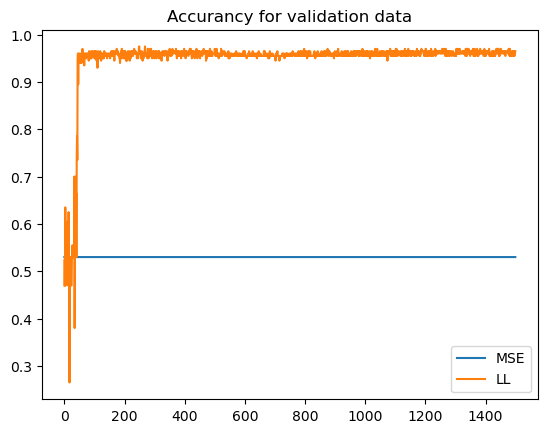

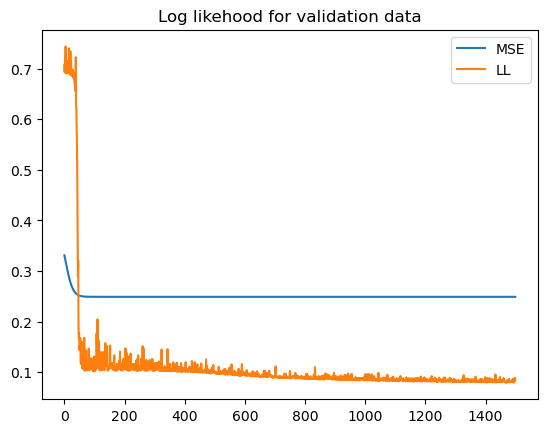

In [35]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))
print("\nwith MSE:")
print("Test accuracy: {0} / {1}".format(acc_val_test_save, test_design.shape[0]))
print("Test loss: {0}".format(loss_test_save))

plt.plot(acc_val_save/train_design.shape[0], label="MSE")
plt.plot(acc_val/train_design.shape[0], label="LL")
plt.title("Accurancy for validation data")
plt.legend()
plt.show()

plt.plot(mse_save, label="MSE")
plt.plot(loglikes, label="LL")
plt.title("Log likehood for validation data");
plt.legend()
plt.show()

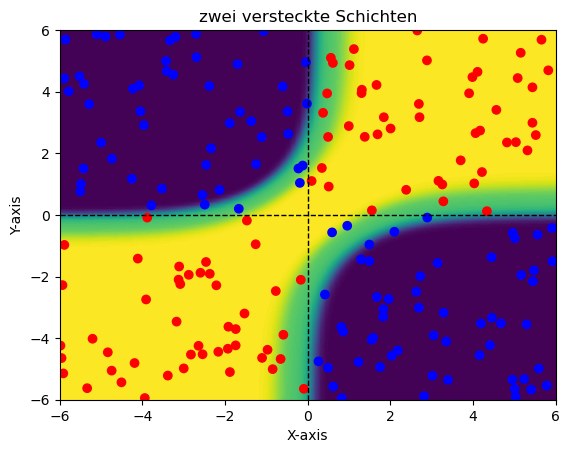

In [36]:
output = feedforward(grid_design.T).reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=100, cmap='viridis')
plot_uniform(train_data, train_labels, "zwei versteckte Schichten")